<a href="https://colab.research.google.com/github/AmitSP-beep/Change-point-detection-and-time-series-analysis/blob/main/time_series_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# URL of the data
url = "https://berkeley-earth-temperature.s3.us-west-1.amazonaws.com/Global/Land_and_Ocean_complete.txt"

# Read the data by skipping comment lines and using whitespace as delimiter
df = pd.read_csv(url, comment='%', delim_whitespace=True, header=None)

# Remove any non-data rows (like headers that appear in between)
df = df[df[0].apply(lambda x: str(x).isdigit())]

# Assign meaningful column names based on Berkeley Earth documentation
df.columns = [
    "Year", "Month", "Monthly_Anomaly", "Unc_Monthly",
    "Annual_Anomaly", "Unc_Annual", "Five_Year_Anomaly",
    "Unc_5yr", "Ten_Year_Anomaly", "Unc_10yr", "Twenty_Year_Anomaly",
    "Unc_20yr"
]

# Save as CSV
df.to_csv("berkeley_global_temperature.csv", index=False)


# Time Series Analysis Project

# Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importing dataset

In [ ]:
df = pd.read_csv('berkeley_global_temperature.csv')
df.head()

Year  Month  Monthly_Anomaly  Unc_Monthly  Annual_Anomaly  Unc_Annual  \
0  1850      1           -0.753        0.365             NaN         NaN   
1  1850      2           -0.202        0.416             NaN         NaN   
2  1850      3           -0.367        0.373             NaN         NaN   
3  1850      4           -0.596        0.324             NaN         NaN   
4  1850      5           -0.619        0.267             NaN         NaN   

   Five_Year_Anomaly  Unc_5yr  Ten_Year_Anomaly  Unc_10yr  \
0                NaN      NaN               NaN       NaN   
1                NaN      NaN               NaN       NaN   
2                NaN      NaN               NaN       NaN   
3                NaN      NaN               NaN       NaN   
4                NaN      NaN               NaN       NaN   

   Twenty_Year_Anomaly  Unc_20yr  
0                  NaN       NaN  
1                  NaN       NaN  
2                  NaN       NaN  
3                  NaN       NaN  
4                  NaN       NaN

In [ ]:
df.shape

(4200, 12)

In [ ]:
df = df[['Year','Month','Monthly_Anomaly']]

In [ ]:
df.head()

Year  Month  Monthly_Anomaly
0  1850      1           -0.753
1  1850      2           -0.202
2  1850      3           -0.367
3  1850      4           -0.596
4  1850      5           -0.619

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             4200 non-null   int64  
 1   Month            4200 non-null   int64  
 2   Monthly_Anomaly  4200 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 98.6 KB


In [ ]:
df.describe()

Year        Month  Monthly_Anomaly
count  4200.000000  4200.000000      4200.000000
mean   1937.000000     6.500000        -0.001763
std      50.523339     3.452464         0.413078
min    1850.000000     1.000000        -1.004000
25%    1893.000000     3.750000        -0.294000
50%    1937.000000     6.500000        -0.093000
75%    1981.000000     9.250000         0.208250
max    2024.000000    12.000000         1.548000

<Axes: title={'center': 'Monthly Temperature Anomaly'}>

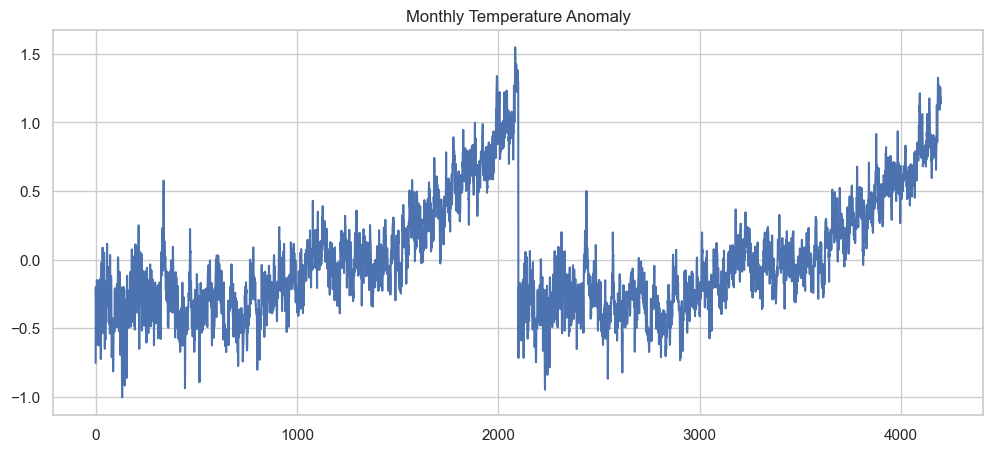

In [ ]:
df["Monthly_Anomaly"].plot(figsize=(12, 5), title="Monthly Temperature Anomaly")

In [ ]:
df = df.iloc[:2100]

In [ ]:
df.head()

Year  Month  Monthly_Anomaly
0  1850      1           -0.753
1  1850      2           -0.202
2  1850      3           -0.367
3  1850      4           -0.596
4  1850      5           -0.619

# Summary Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             2100 non-null   int64  
 1   Month            2100 non-null   int64  
 2   Monthly_Anomaly  2100 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 49.3 KB


In [ ]:
df.shape

(2100, 3)

In [ ]:
print(df.isnull().sum())
print(df.duplicated().sum())

Year               0
Month              0
Monthly_Anomaly    0
dtype: int64
0


In [ ]:
import pandas as pd

# Assuming df already contains Year, Month, and Monthly_Anomaly columns

# Step 1: Add 'Day' column with value 1 (first day of each month)
df['Day'] = 1

# Step 2: Convert to datetime format
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Optional: Set Date as index for time series work
df.set_index('Date', inplace=True)



In [ ]:
df.head()

Year  Month  Monthly_Anomaly  Day
Date                                         
1850-01-01  1850      1           -0.753    1
1850-02-01  1850      2           -0.202    1
1850-03-01  1850      3           -0.367    1
1850-04-01  1850      4           -0.596    1
1850-05-01  1850      5           -0.619    1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2100 entries, 1850-01-01 to 2024-12-01
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             2100 non-null   int64  
 1   Month            2100 non-null   int64  
 2   Monthly_Anomaly  2100 non-null   float64
 3   Day              2100 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 82.0 KB


In [ ]:
df = df[['Monthly_Anomaly']]
df = df.asfreq('MS')

In [ ]:
df.head()

Monthly_Anomaly
Date                       
1850-01-01           -0.753
1850-02-01           -0.202
1850-03-01           -0.367
1850-04-01           -0.596
1850-05-01           -0.619

In [ ]:
df.shape

(2100, 1)

# Temperature Anomaly over time

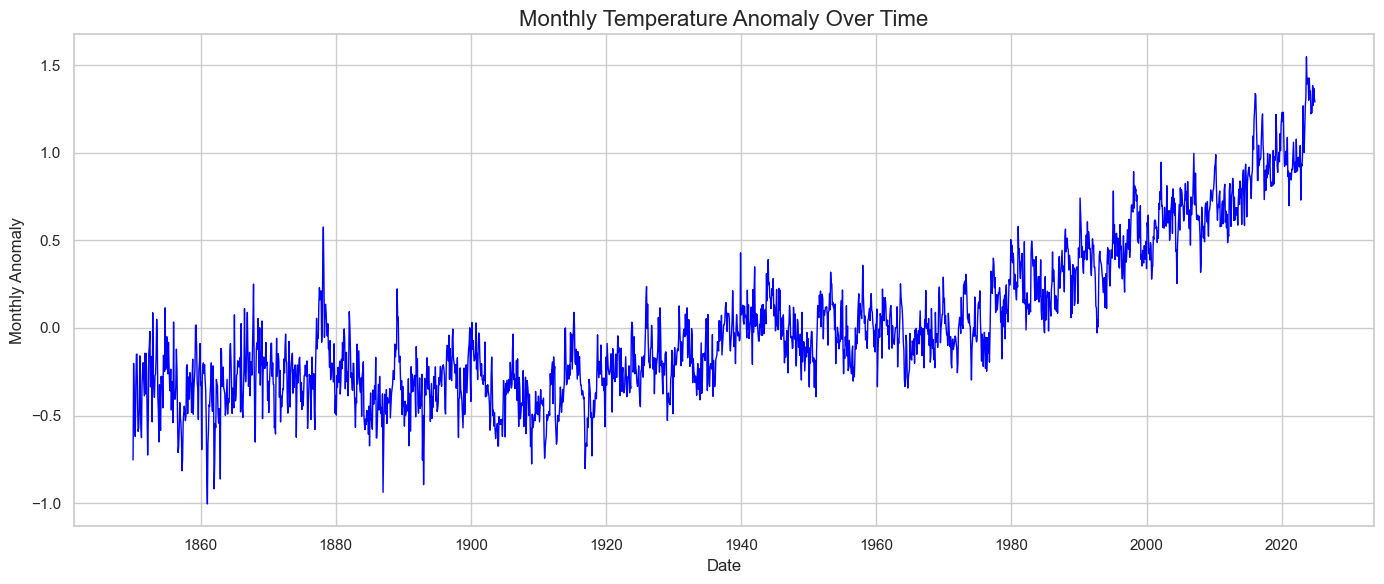

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plot the time series
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Monthly_Anomaly'], color='blue', linewidth=1)
plt.title("Monthly Temperature Anomaly Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Monthly Anomaly", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


# Checking Null values

In [ ]:
print(df.isnull().sum())

Monthly_Anomaly    0
dtype: int64


# Density Plot of Temperature Anomaly

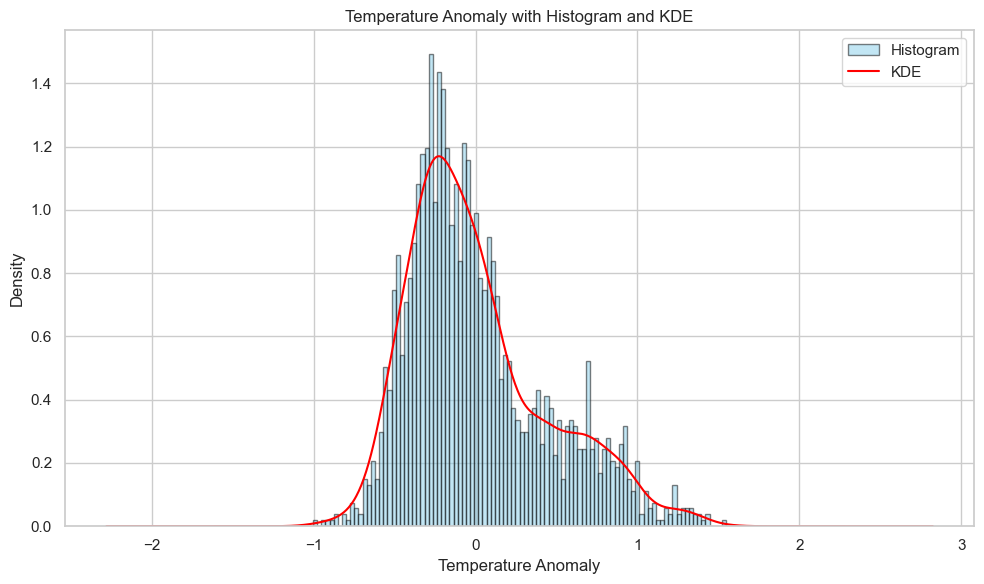

In [ ]:
plt.figure(figsize=(10, 6))
price_data = df['Monthly_Anomaly']
price_data.plot(kind='hist', bins=100, density=True, alpha=0.5, label='Histogram', color='skyblue', edgecolor='black')
price_data.plot(kind='kde', label='KDE', color='red')

# Add labels and legend
plt.title("Temperature Anomaly with Histogram and KDE")
plt.xlabel("Temperature Anomaly")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

(1) The distribution is not symmetric , it is right-skewed(positively skewed)


(2) The right tail is longer, indicating that higher temperature anomalies occur less frequently but are more spread out.

# Boxplot:

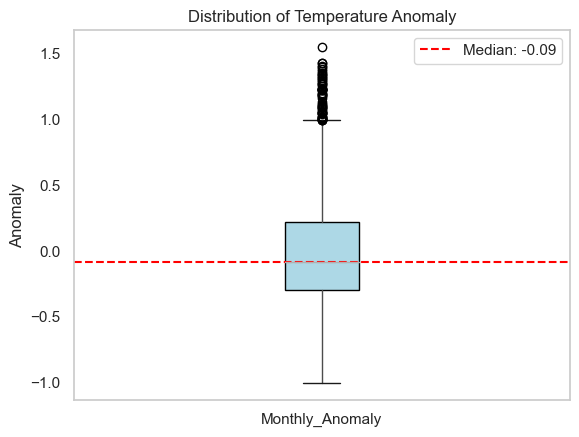

In [ ]:
# Plot the boxplot
box = df.boxplot(column=["Monthly_Anomaly"], grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Calculate the median
median_value = np.median(df["Monthly_Anomaly"])

# Add the median as a horizontal line
plt.axhline(median_value, color='red', linestyle='--', linewidth=1.5, label=f'Median: {median_value:.2f}')

# Add labels and title
plt.title("Distribution of Temperature Anomaly")
plt.ylabel("Anomaly")
plt.legend()

# Show plot
plt.show()

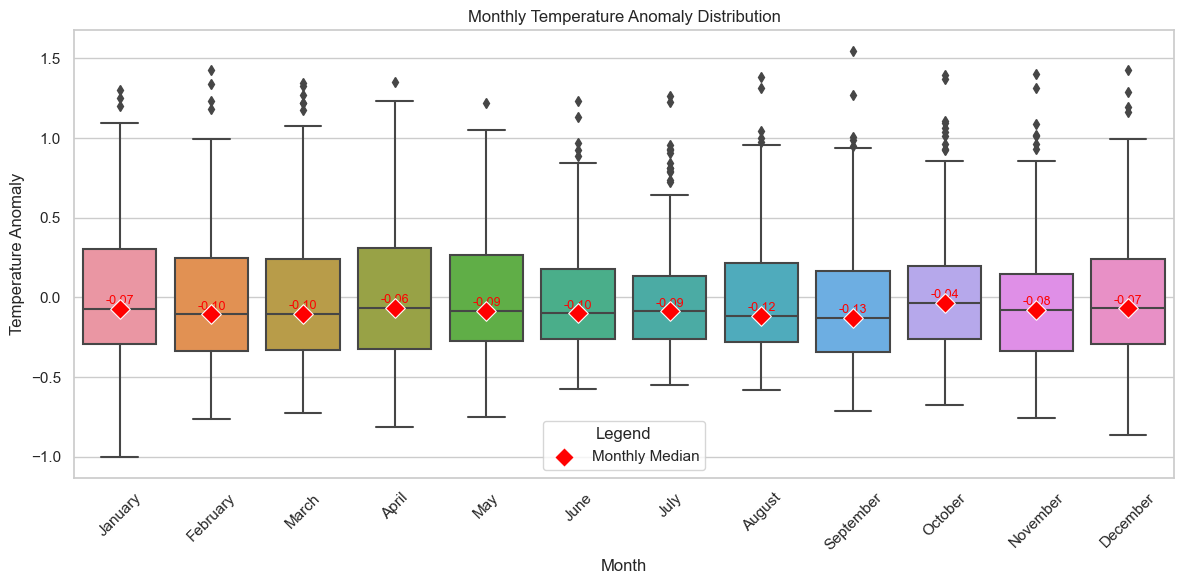

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define correct month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df1 = df

# If you don't already have a 'Month' column with names, create it:
df1['Month'] = df1.index.month_name()
# Compute monthly medians
monthly_medians = df1.groupby('Month')['Monthly_Anomaly'].median()
monthly_medians = monthly_medians.reindex(month_order)

# Plot with proper month order and labels
plt.figure(figsize=(12, 6))
plot = sns.boxplot(x="Month", y="Monthly_Anomaly", data=df1, order=month_order)
# Overlay median points
sns.scatterplot(x=month_order, y=monthly_medians.values, color='red', label='Monthly Median', zorder=10, s=100, marker='D')
plot.set(
    title="Monthly Temperature Anomaly Distribution",
    xlabel="Month",
    ylabel="Temperature Anomaly"
)
for i, (month, median) in enumerate(monthly_medians.items()):
    plt.text(i, median + 0.01, f'{median:.2f}', ha='center', va='bottom', fontsize=9, color='red')
plt.xticks(rotation=45)  # Optional: rotate for better readability
plt.legend(title="Legend")
plt.tight_layout()
plt.show()


Key Observations:
Median Anomalies:

(1) All months have negative medians, meaning below-average temperatures are more common across the dataset.

(2) The coldest median anomaly is in September (-0.13).

(3) The "least cold" or closest to neutral anomaly is in April (-0.06).

Spread and Outliers:

(1) January to May and November to December show a wider spread, indicating more variability in temperature anomalies.

(2) Summer months (June–September) have narrower boxes, suggesting more stable anomalies.

(3) All months have outliers, but June–September have more clustered outliers above the upper whisker, possibly indicating sporadic warm spells.

Overall Trend:

While temperature anomalies vary throughout the year, no clear month shows positive median anomaly, which may point to a consistent cooling bias in the data (possibly a historical dataset).



# Lag Scatter Plot:

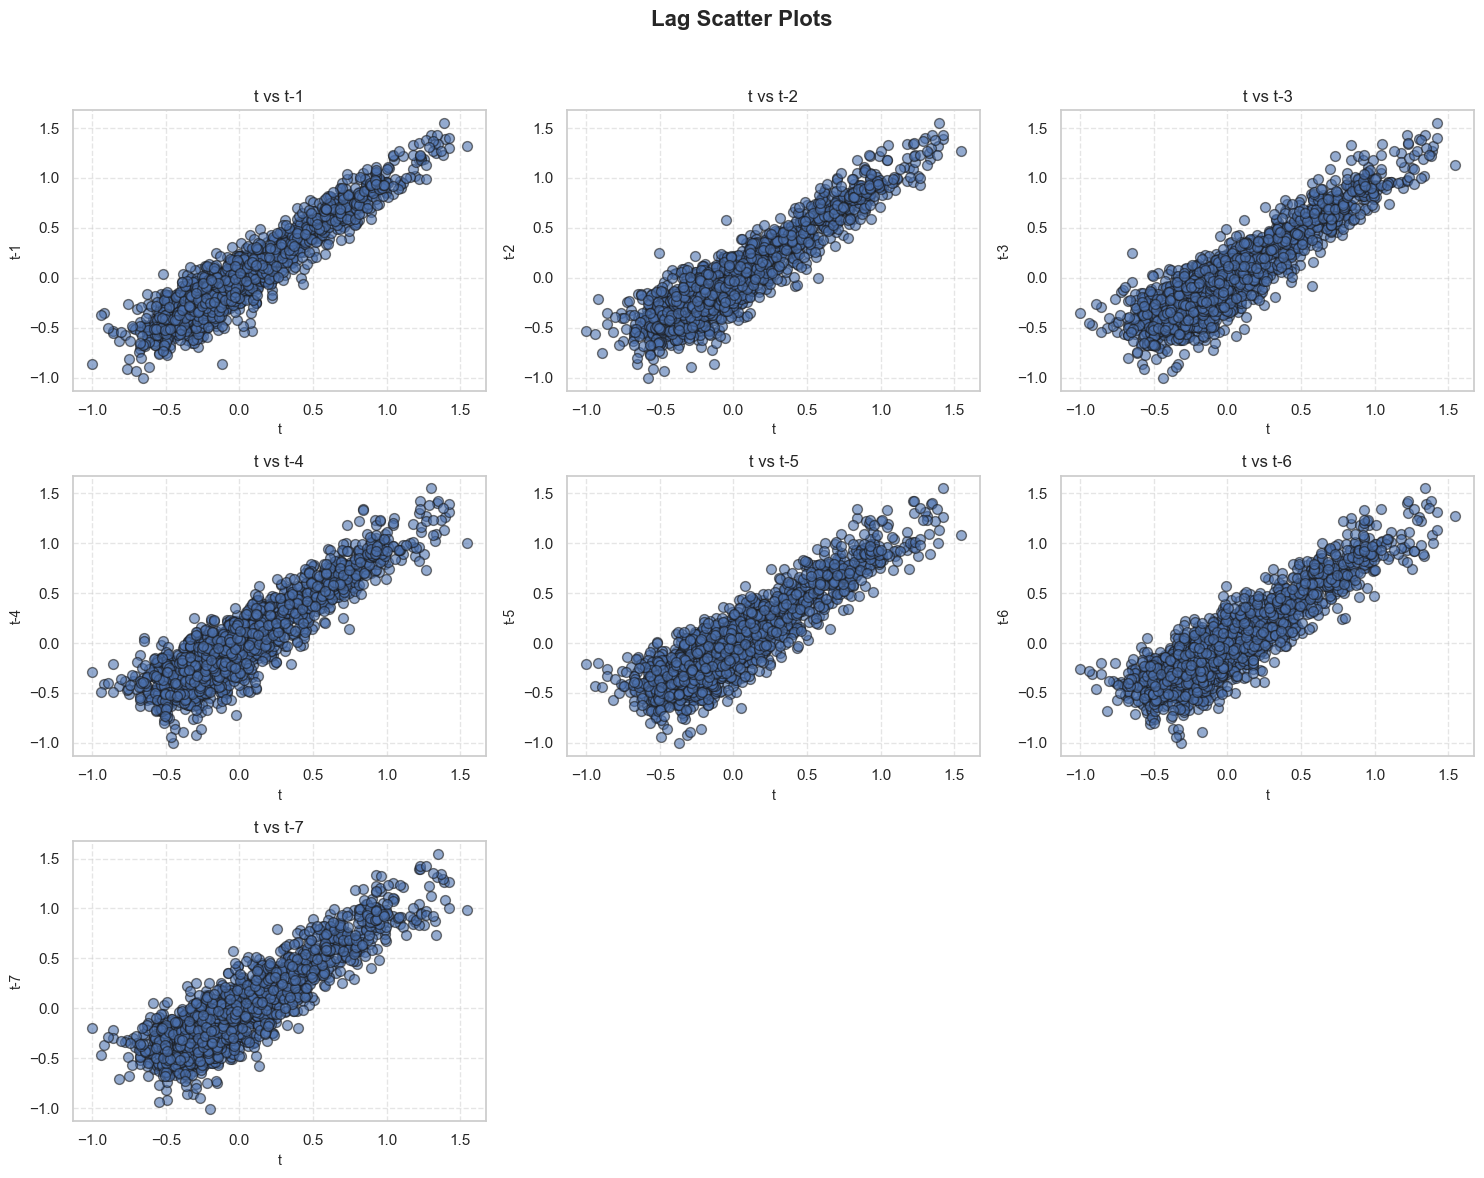

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pandas import concat, DataFrame

# Prepare lagged dataframe
values = DataFrame(df['Monthly_Anomaly'])
lags = 7
columns = [values]

for i in range(1, lags + 1):
    columns.append(values.shift(i))

dataframe = concat(columns, axis=1)
column_names = ['t'] + [f't-{i}' for i in range(1, lags + 1)]
dataframe.columns = column_names
dataframe.dropna(inplace=True)  # Drop rows with NaNs from shifting

# Dynamic subplot layout
n_cols = 3
n_rows = int(np.ceil(lags / n_cols))

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i in range(1, lags + 1):
    ax = plt.subplot(n_rows, n_cols, i)
    ax.scatter(dataframe['t'], dataframe[f't-{i}'], alpha=0.6, edgecolors='k', s=50)
    ax.set_title(f't vs t-{i}', fontsize=12)
    ax.set_xlabel('t', fontsize=10)
    ax.set_ylabel(f't-{i}', fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.5)

plt.suptitle("Lag Scatter Plots", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Interpretation:

(1) Strong positive linear correlation:

(a) The plots show that as the lag increases from 1 to 7, the positive linear relationship is still clearly visible.


(b) This indicates strong autocorrelation across multiple lags.


(c) The points are tightly clustered around a straight diagonal line (bottom-left to top-right).


(2) Gradual decay in linearity:


(a) As lag increases (e.g., from t-1 to t-7), the spread of the points gradually increases.


(b) That means the strength of correlation decreases with lag — which is expected in an autoregressive process.


(3) Implication:


(a) The time series likely has a strong AR (AutoRegressive) component.


(b) These lag scatter plots support the idea of fitting an ARIMA or SARIMA model.


(c) High correlation at multiple lags also suggests possible seasonality or trend.

# Autocorrelation of Monthly Anomaly

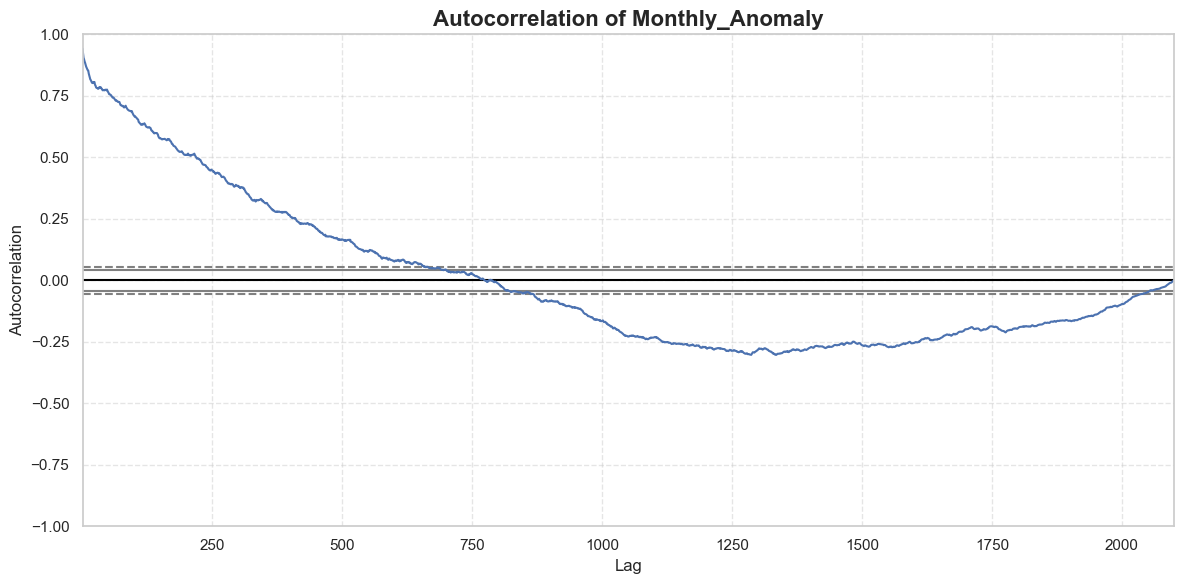

In [ ]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(12, 6))  # Bigger figure for readability
autocorrelation_plot(df['Monthly_Anomaly'])

plt.title('Autocorrelation of Monthly_Anomaly', fontsize=16, fontweight='bold')
plt.xlabel('Lag', fontsize=12)
plt.ylabel('Autocorrelation', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
df.head()

Monthly_Anomaly     Month
Date                                 
1850-01-01           -0.753   January
1850-02-01           -0.202  February
1850-03-01           -0.367     March
1850-04-01           -0.596     April
1850-05-01           -0.619       May

In [ ]:
df = df[['Monthly_Anomaly']]

In [ ]:
df.head()

Monthly_Anomaly
Date                       
1850-01-01           -0.753
1850-02-01           -0.202
1850-03-01           -0.367
1850-04-01           -0.596
1850-05-01           -0.619

# Seasonal Decomposition

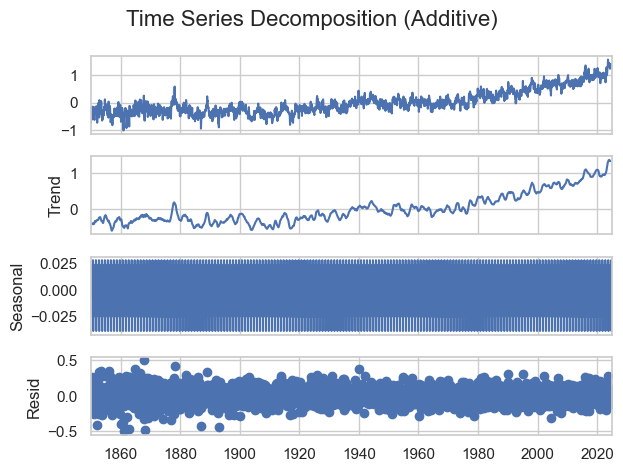

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
result = seasonal_decompose(df, model='additive', period=12)  # period=12 for monthly data (1 year)

# Plot the decomposition
result.plot()
plt.suptitle('Time Series Decomposition (Additive)', fontsize=16)
plt.tight_layout()
plt.show()


# Trend and Residual Component

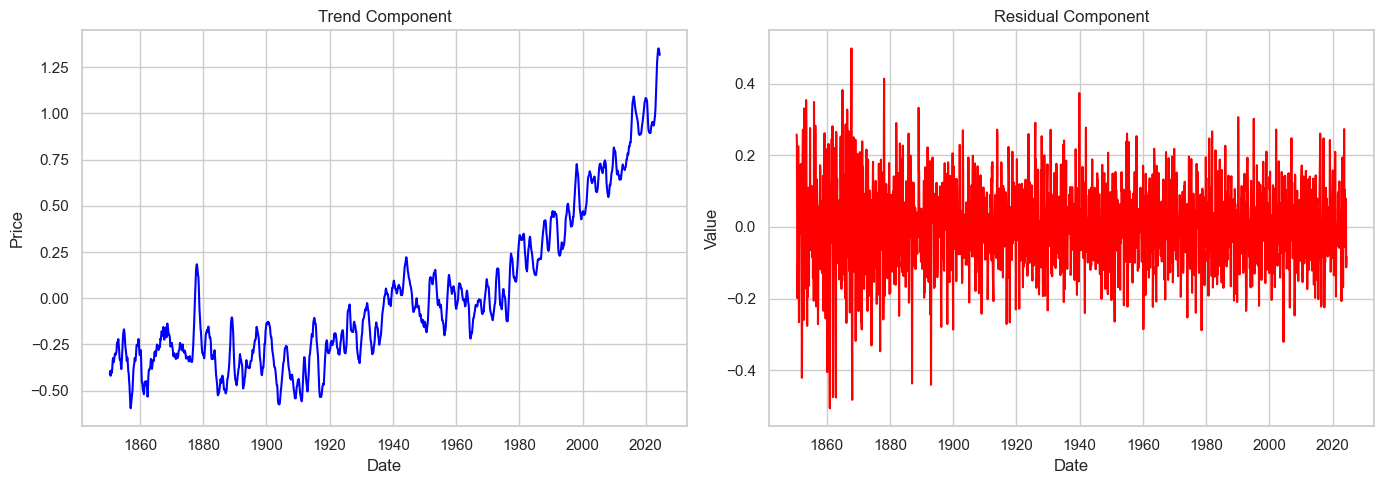

In [ ]:
# Extract trend and residual components
trend = result.trend
residual = result.resid

# Create side-by-side subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Plot trend
axes[0].plot(trend, color='blue')
axes[0].set_title('Trend Component')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price')
axes[0].grid(True)

# Plot residual
axes[1].plot(residual, color='red')
axes[1].set_title('Residual Component')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Value')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Differencing and density plot of residual

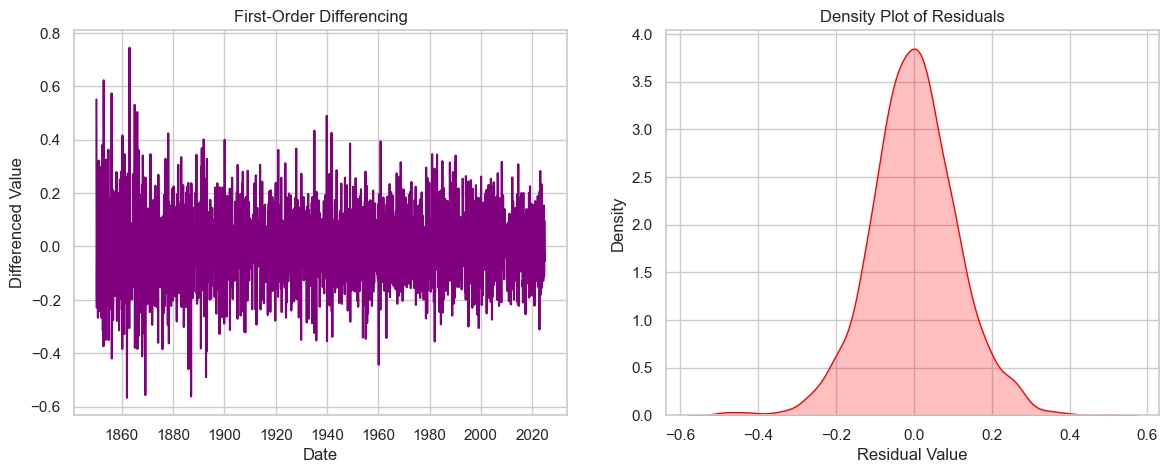

In [ ]:
# First-order differencing
diff_1 = df.diff()

# Create side-by-side subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Plot first-order differencing
axes[0].plot(diff_1, color='purple')
axes[0].set_title('First-Order Differencing')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Differenced Value')
axes[0].grid(True)

# Plot residual
import seaborn as sns
sns.kdeplot(residual.dropna(), color='red', fill=True)
plt.title("Density Plot of Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()

Time series is not stationary due to presence of trend . We will check whether the time series becomes stationary after doing first differencing

In [ ]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable


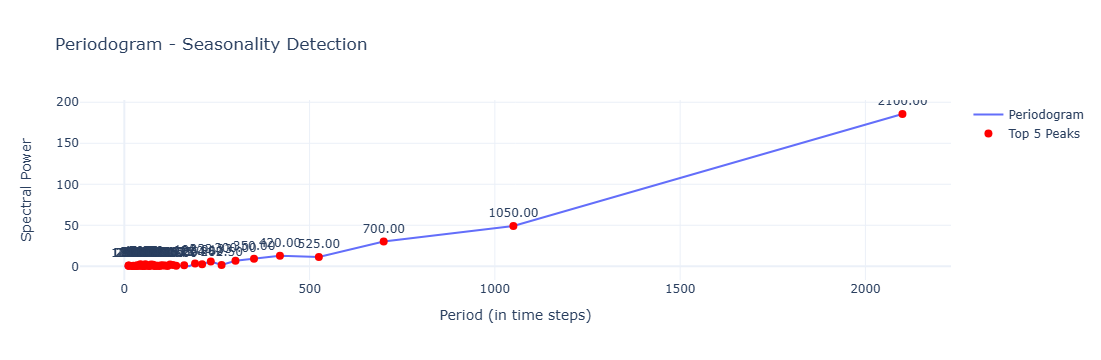

Top 5 Seasonality Periods (in time steps):
          Period       Power
0    2100.000000  185.704807
1    1050.000000   49.130207
2     700.000000   30.222484
4     420.000000   12.767849
3     525.000000   11.476374
5     350.000000    9.343847
6     300.000000    6.809256
8     233.333333    5.744367
10    190.909091    3.445921
9     210.000000    2.588548
47     43.750000    2.495122
36     56.756757    2.491855
28     72.413793    2.204654
16    123.529412    2.148275
26     77.777778    1.898618
15    131.250000    1.663159
48     42.857143    1.661327
7     262.500000    1.603068
20    100.000000    1.319475
41     50.000000    1.318348
12    161.538462    1.234021
60     34.426230    1.172417
33     61.764706    1.144150
52     39.622642    1.140060
18    110.526316    1.094038
29     70.000000    1.054946
176    11.864407    0.956780
19    105.000000    0.867902
24     84.000000    0.823018
39     52.500000    0.788653
23     87.500000    0.772745
14    140.000000    0.605733


In [ ]:
import numpy as np
import pandas as pd
from scipy.signal import periodogram
import plotly.graph_objects as go

# ----- Replace this with your time series -----
# Assume your monthly time series is in a Pandas Series called `series`
series = df['Monthly_Anomaly']
series = series.dropna().values  # ensure no NaNs

# ----- Step 1: Compute periodogram -----
frequencies, power = periodogram(series)

# ----- Step 2: Convert frequency to period -----
nonzero_indices = frequencies > 0  # avoid division by zero
frequencies = frequencies[nonzero_indices]
power = power[nonzero_indices]
periods = 1 / frequencies

# ----- Step 3: Create a dataframe to find top periods -----
df_periods = pd.DataFrame({'Period': periods, 'Power': power})
df_top = df_periods.sort_values(by='Power', ascending=False).head(50)

# ----- Step 4: Plot with Plotly -----
fig = go.Figure()

fig.add_trace(go.Scatter(x=periods, y=power,
                         mode='lines',
                         name='Periodogram'))

# Mark top 5 seasonal periods
fig.add_trace(go.Scatter(x=df_top['Period'], y=df_top['Power'],
                         mode='markers+text',
                         text=[f"{p:.2f}" for p in df_top['Period']],
                         textposition='top center',
                         marker=dict(color='red', size=8),
                         name='Top 5 Peaks'))

fig.update_layout(title='Periodogram - Seasonality Detection',
                  xaxis_title='Period (in time steps)',
                  yaxis_title='Spectral Power',
                  template='plotly_white')

fig.show()

# ----- Step 5: Print top 5 periods -----
print("Top 5 Seasonality Periods (in time steps):")
print(df_top[['Period', 'Power']])


# ADF Statistics

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Suppose your series is called 'Monthly_Anomaly'
# Replace with your actual pandas Series name
result = adfuller(df['Monthly_Anomaly'].dropna())

# Extracting results
adf_statistic = result[0]
p_value = result[1]
used_lag = result[2]
n_obs = result[3]
critical_values = result[4]

# Printing results
print("Augmented Dickey-Fuller Test Results:")
print(f"ADF Statistic      : {adf_statistic}")
print(f"p-value            : {p_value}")
print(f"Number of lags     : {used_lag}")
print(f"Number of obs used : {n_obs}")
print("Critical Values    :")
for key, value in critical_values.items():
    print(f"   {key}: {value}")

# Stationarity decision
if p_value < 0.05:
    print("\n✅ The series is likely **stationary** (reject null hypothesis).")
else:
    print("\n❌ The series is likely **non-stationary** (fail to reject null hypothesis).")


Augmented Dickey-Fuller Test Results:
ADF Statistic      : -0.2591082522098123
p-value            : 0.931099474513306
Number of lags     : 24
Number of obs used : 2075
Critical Values    :
   1%: -3.433505377391427
   5%: -2.862933903509104
   10%: -2.567512049992742

❌ The series is likely **non-stationary** (fail to reject null hypothesis).


In [ ]:
# p-value > 0.05  so we reject null hypothesis.Hence data is non-stationary

# ADF test on differenced series

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Step 1: First-order differencing
diff_series = df['Monthly_Anomaly'].diff().dropna()

# Step 2: ADF Test on differenced series
result_diff = adfuller(diff_series)

# Step 3: Extract and display results
print("ADF Test After First Differencing:")
print(f"ADF Statistic      : {result_diff[0]}")
print(f"p-value            : {result_diff[1]}")
print(f"Number of lags     : {result_diff[2]}")
print(f"Number of obs used : {result_diff[3]}")
print("Critical Values    :")
for key, value in result_diff[4].items():
    print(f"   {key}: {value}")

# Stationarity decision
if result_diff[1] < 0.05:
    print("\n✅ The differenced series is likely **stationary**.")
else:
    print("\n❌ The differenced series is still **non-stationary**.")


ADF Test After First Differencing:
ADF Statistic      : -13.154914337096226
p-value            : 1.3434012710994905e-24
Number of lags     : 23
Number of obs used : 2075
Critical Values    :
   1%: -3.433505377391427
   5%: -2.862933903509104
   10%: -2.567512049992742

✅ The differenced series is likely **stationary**.


# ACF and PACF plots

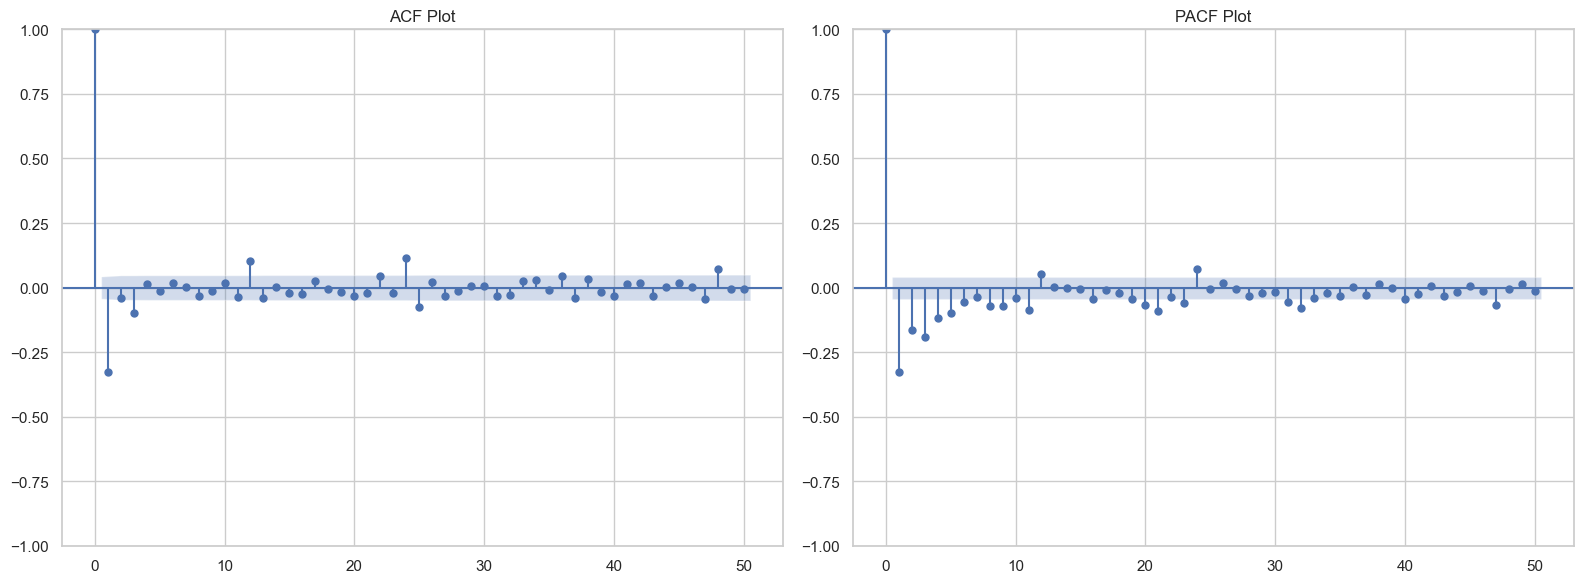

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Use the original or differenced series
series = df['Monthly_Anomaly'].diff().dropna()  # Use differenced if original was non-stationary

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plot_acf(series, ax=axes[0], lags=50, title='ACF Plot')
plot_pacf(series, ax=axes[1], lags=50, title='PACF Plot', method='ywm')

plt.tight_layout()
plt.show()


# Checking whether time series is random walk

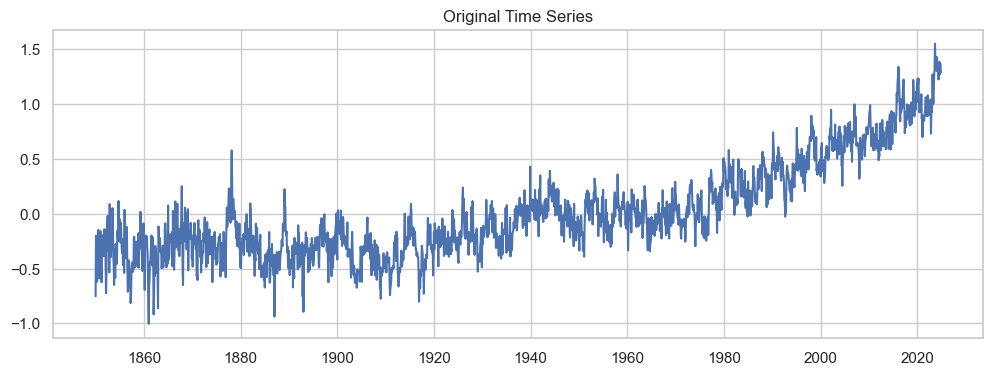

ADF Test on Original Series:
ADF Statistic: -0.2591082522098123
p-value      : 0.931099474513306
❌ The series is likely Non-Stationary (could be a Random Walk)


<Figure size 1000x400 with 0 Axes>

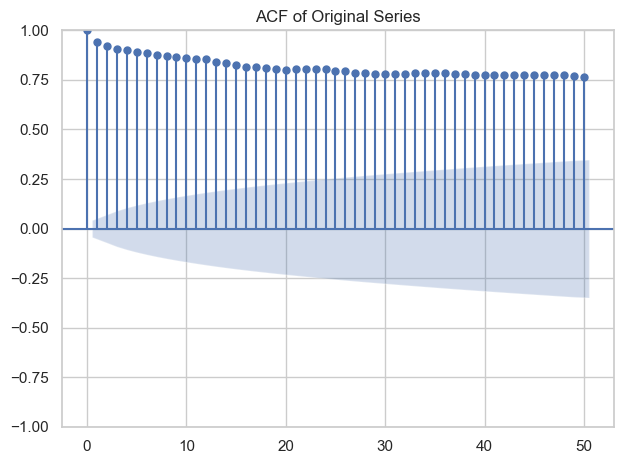


ADF Test on First-Differenced Series:
ADF Statistic: -13.154914337096226
p-value      : 1.3434012710994905e-24
✅ The differenced series is Stationary


<Figure size 1000x400 with 0 Axes>

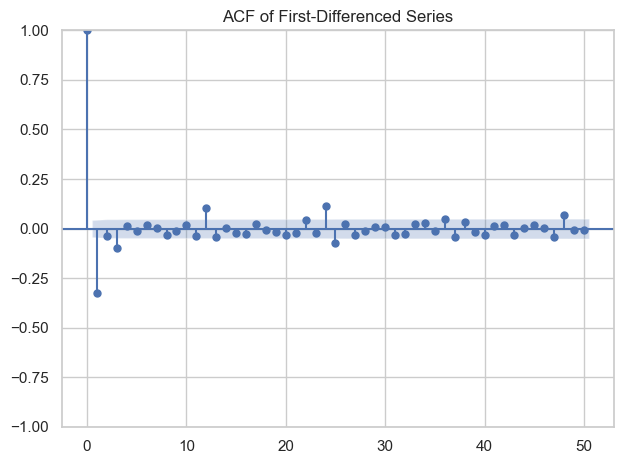


🔍 FINAL CONCLUSION:
✅ Based on ADF tests and visual inspection, your time series is likely a **Random Walk**.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# --- STEP 1: Load your time series ---
series = df['Monthly_Anomaly'].dropna()

# --- STEP 2: Plot original series ---
plt.figure(figsize=(12, 4))
plt.plot(series)
plt.title("Original Time Series")
plt.grid(True)
plt.show()

# --- STEP 3: ADF Test on original series ---
adf_result = adfuller(series)
adf_stat_orig = adf_result[0]
p_val_orig = adf_result[1]

print("ADF Test on Original Series:")
print(f"ADF Statistic: {adf_stat_orig}")
print(f"p-value      : {p_val_orig}")
if p_val_orig > 0.05:
    print("❌ The series is likely Non-Stationary (could be a Random Walk)")
else:
    print("✅ The series is likely Stationary")

# --- STEP 4: Plot ACF of original series ---
plt.figure(figsize=(10, 4))
plot_acf(series, lags=50)
plt.title("ACF of Original Series")
plt.tight_layout()
plt.show()

# --- STEP 5: First differencing ---
diff_series = series.diff().dropna()

# --- STEP 6: ADF Test on differenced series ---
adf_diff_result = adfuller(diff_series)
adf_stat_diff = adf_diff_result[0]
p_val_diff = adf_diff_result[1]

print("\nADF Test on First-Differenced Series:")
print(f"ADF Statistic: {adf_stat_diff}")
print(f"p-value      : {p_val_diff}")
if p_val_diff < 0.05:
    print("✅ The differenced series is Stationary")
else:
    print("❌ The differenced series is still Non-Stationary")

# --- STEP 7: Plot ACF of differenced series ---
plt.figure(figsize=(10, 4))
plot_acf(diff_series, lags=50)
plt.title("ACF of First-Differenced Series")
plt.tight_layout()
plt.show()

# --- FINAL CONCLUSION ---
print("\n🔍 FINAL CONCLUSION:")
if p_val_orig > 0.05 and p_val_diff < 0.05:
    print("✅ Based on ADF tests and visual inspection, your time series is likely a **Random Walk**.")
else:
    print("❌ Your time series does not exhibit the characteristics of a pure Random Walk.")


## Ljung-Box test:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox

# --- Step 1: Load your time series ---
# Replace with your actual series column name
series = df['Monthly_Anomaly'].dropna()

# --- Step 2: Perform Ljung-Box test ---
ljung_result = acorr_ljungbox(series, lags=20, return_df=True)

# --- Step 3: Display Ljung-Box test results ---
print("🔍 Ljung-Box Test Results (up to lag 20):")
print(ljung_result)

# --- Step 4: Interpretation ---
print("\n📌 Interpretation:")
significant_lags = ljung_result[ljung_result['lb_pvalue'] < 0.05]

if not significant_lags.empty:
    print("❌ The p-values for some lags are < 0.05, which means:")
    print(f"- Significant autocorrelation exists at lags: {list(significant_lags.index + 1)}")
    print("- The series is **not white noise**.")
    print("- Suggests structure or pattern remains in the data.")
else:
    print("✅ All p-values are > 0.05 for all lags up to 20.")
    print("- No significant autocorrelation detected.")
    print("- The series behaves like **white noise** (random).")


🔍 Ljung-Box Test Results (up to lag 20):
         lb_stat  lb_pvalue
1    1869.566188        0.0
2    3659.046425        0.0
3    5384.531277        0.0
4    7086.510065        0.0
5    8757.562375        0.0
6   10407.422421        0.0
7   12029.730789        0.0
8   13624.478179        0.0
9   15202.101207        0.0
10  16766.527097        0.0
11  18310.484163        0.0
12  19850.835992        0.0
13  21347.744856        0.0
14  22816.334210        0.0
15  24255.257166        0.0
16  25670.096345        0.0
17  27074.972561        0.0
18  28461.819011        0.0
19  29834.703987        0.0
20  31201.003149        0.0

📌 Interpretation:
❌ The p-values for some lags are < 0.05, which means:
- Significant autocorrelation exists at lags: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
- The series is **not white noise**.
- Suggests structure or pattern remains in the data.


# Finding accurate orders to fit the ARIMA model

In [ ]:
import warnings
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import itertools

warnings.filterwarnings("ignore")

# Assuming your original data is in `df['Temperature']`
y = df['Monthly_Anomaly']

# Define parameter range
p = range(0, 4)
d = range(0, 2)
q = range(0, 4)

# Create all combinations
pdq = list(itertools.product(p, d, q))

# Track best model
best_aic = np.inf
best_order = None
results = []

for order in pdq:
    try:
        model = ARIMA(y, order=order)
        result = model.fit()
        results.append({'order': order, 'aic': result.aic})
        if result.aic < best_aic:
            best_aic = result.aic
            best_order = order
    except:
        continue

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results).sort_values(by='aic')

# Show best model
print("Best ARIMA order:", best_order)
print("Lowest AIC:", best_aic)
results_df.head()

Best ARIMA order: (2, 1, 3)
Lowest AIC: -2697.5978873187223


order          aic
23  (2, 1, 3) -2697.597887
15  (1, 1, 3) -2693.449983
30  (3, 1, 2) -2692.496047
27  (3, 0, 3) -2690.970270
14  (1, 1, 2) -2688.975330

# Fitting ARIMA model

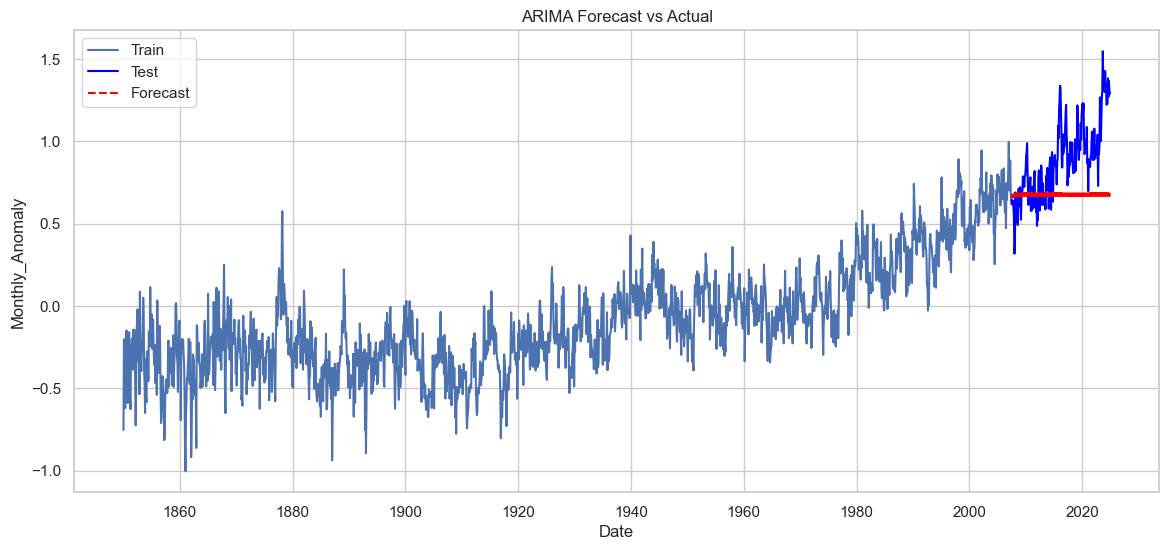

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

# Determine split index
split_index = int(len(df) * 0.9)

# Create training and test sets
train = df['Monthly_Anomaly'][:split_index]
test = df['Monthly_Anomaly'][split_index:]

# Fit model on training set with best parameters
best_order = (2, 1, 3)  # Replace with your best (p, d, q)
model = ARIMA(train, order=best_order)
model_fit = model.fit()

# Forecast the next len(test) periods
forecast = model_fit.forecast(steps=len(test))

# Plot actual vs forecast
plt.figure(figsize=(14,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Monthly_Anomaly')
plt.title('ARIMA Forecast vs Actual')
plt.legend()
plt.grid(True)
plt.show()


# Fitting SARIMAX Model

In [ ]:
# Fit SARIMAX with trend
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train, order=(2, 1, 3), trend='t')  # trend='t' adds a linear trend
model_fit = model.fit(disp=False)


In [ ]:
# Forecast the same number of steps as test set
forecast = model_fit.forecast(steps=len(test))


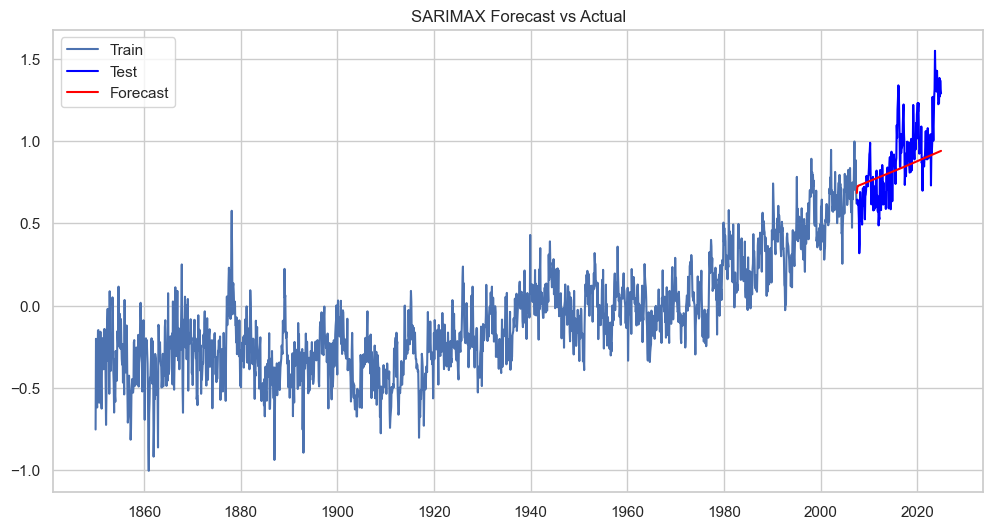

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('SARIMAX Forecast vs Actual')
plt.legend()
plt.grid(True)
plt.show()


# Fitting SARIMA Model

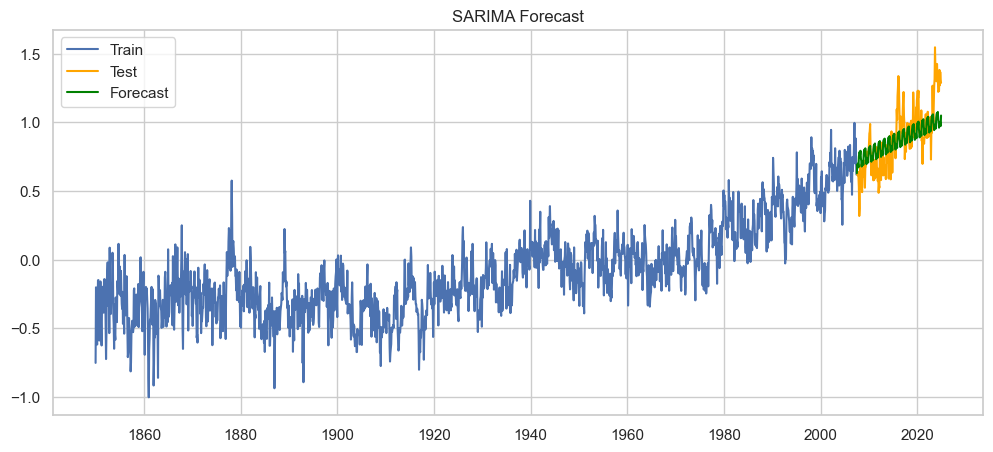

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 1: Prepare datetime index and data
data = df

# Step 2: Train-test split (90%-10%)
train_size = int(len(df) * 0.9)
train = data.iloc[:train_size]
test = data.iloc[train_size:]

# Step 3: Fit SARIMA model (SARIMAX with only endog → pure SARIMA)
model = SARIMAX(train,
                order=(2, 1, 3),
                seasonal_order=(1, 1, 1 , 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# Step 4: Forecast
forecast = results.forecast(steps=len(test))

# Step 5: Plot
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(test.index, forecast, label='Forecast', color='green')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()


# Calculating the errors

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 1: Forecast the same number of steps as in your test set
n_steps = len(test)
forecast = model_fit.forecast(steps=n_steps)

# Step 2: Compute MAE, MSE, MAPE
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
mape = np.mean(np.abs((test - forecast) / test)) * 100

# Step 3: Print the results
print(f"MAE  = {mae:.4f}")
print(f"MSE  = {mse:.4f}")
print(f"MAPE = {mape:.2f}%")

MAE  = 0.1427
MSE  = 0.0375
MAPE = nan%


# Residual Analysis

In [ ]:
residuals = results.resid

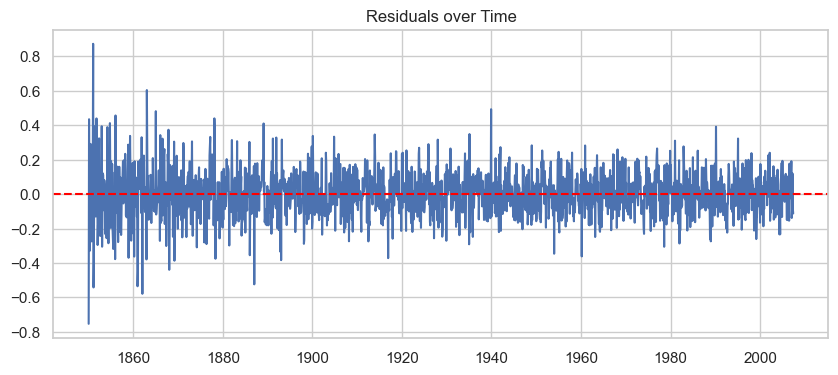

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals over Time')
plt.show()


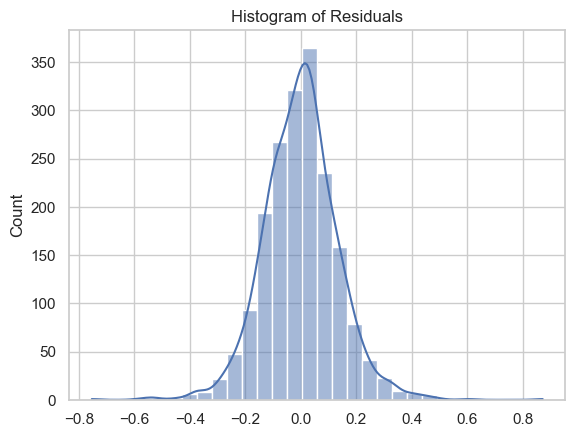

In [ ]:
sns.histplot(residuals, kde=True, bins=30)
plt.title('Histogram of Residuals')
plt.show()

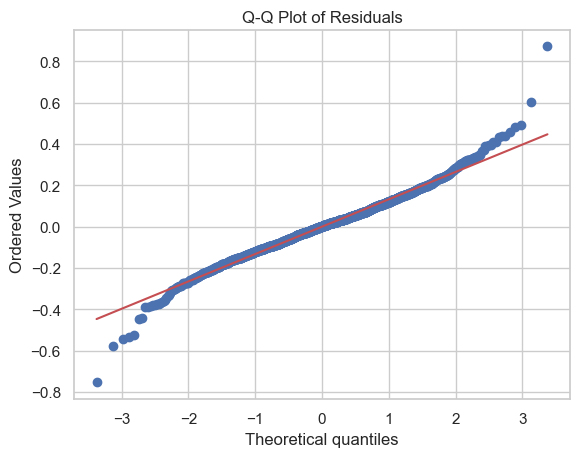

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

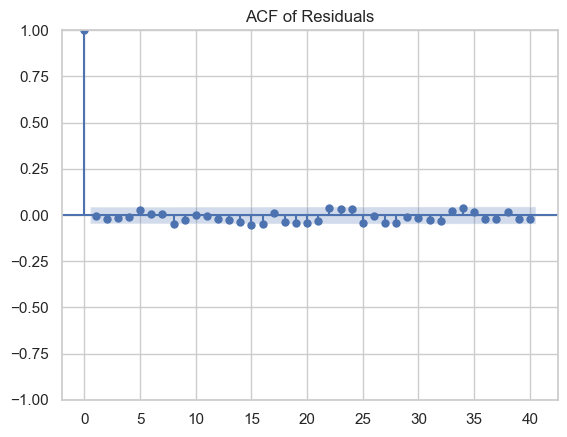

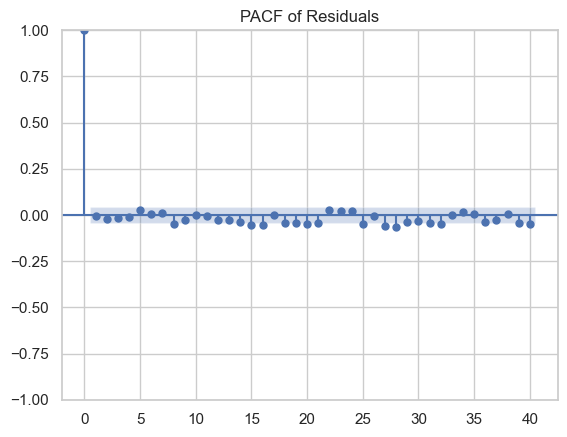

In [ ]:
plot_acf(residuals, lags=40)
plt.title('ACF of Residuals')
plt.show()

plot_pacf(residuals, lags=40)
plt.title('PACF of Residuals')
plt.show()

# Ljung box test

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Run Ljung-Box test for multiple lags (e.g., 10, 20)
lb_test = acorr_ljungbox(residuals, lags=[10, 20], return_df=True)

# Print the results
print("Ljung-Box Test Results:")
print(lb_test)

# Interpretation based on p-values
for lag in lb_test.index:
    p_value = lb_test.loc[lag, 'lb_pvalue']
    print(f"\n[Interpretation for lag={lag}]:")
    if p_value > 0.05:
        print(f"✅ Residuals are likely white noise (p-value = {p_value:.4f}). No autocorrelation remains.")
    else:
        print(f"❌ Residuals may have autocorrelation (p-value = {p_value:.4f}). Model may be inadequate.")


Ljung-Box Test Results:
      lb_stat  lb_pvalue
10   8.629928   0.567547
20  33.464216   0.029986

[Interpretation for lag=10]:
✅ Residuals are likely white noise (p-value = 0.5675). No autocorrelation remains.

[Interpretation for lag=20]:
❌ Residuals may have autocorrelation (p-value = 0.0300). Model may be inadequate.


# Checking Normality of residuals

In [ ]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test
stat, p_value = shapiro(residuals)

# Print the test results
print(f"Shapiro-Wilk Test Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value > 0.05:
    print("✅ Residuals likely follow a normal distribution (Fail to reject H0).")
else:
    print("❌ Residuals do not follow a normal distribution (Reject H0).")


Shapiro-Wilk Test Statistic: 0.9812
P-value: 0.0000
❌ Residuals do not follow a normal distribution (Reject H0).


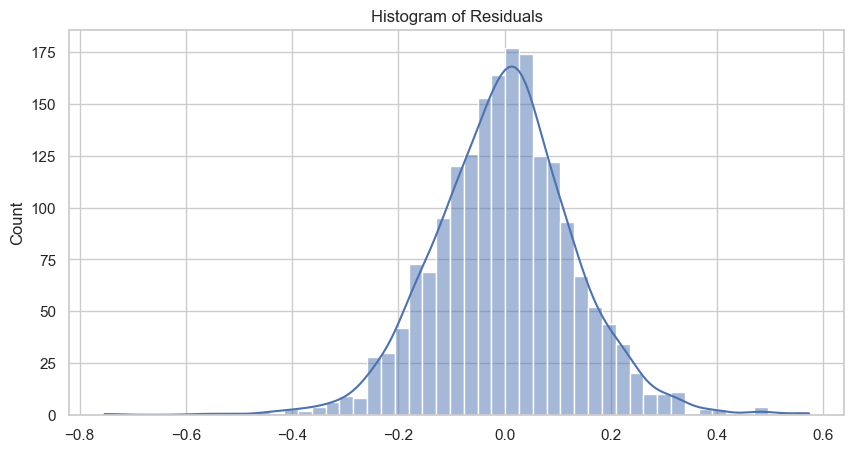

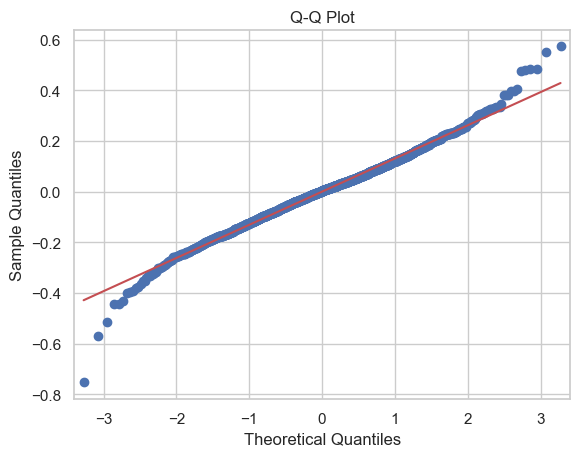

Shapiro-Wilk Test: Statistic=0.9896, p-value=0.0000
D’Agostino and Pearson Test: Statistic=63.7486, p-value=0.0000
Anderson-Darling Test Statistic: 2.7424
At 15.0% significance level: Residuals NOT normal (stat > critical value)
At 10.0% significance level: Residuals NOT normal (stat > critical value)
At 5.0% significance level: Residuals NOT normal (stat > critical value)
At 2.5% significance level: Residuals NOT normal (stat > critical value)
At 1.0% significance level: Residuals NOT normal (stat > critical value)


In [ ]:
from scipy.stats import shapiro, normaltest, anderson
import matplotlib.pyplot as plt
import seaborn as sns

# Assume residuals is your residuals array or series
residuals = model_fit.resid

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

# Q-Q plot (again for visual reference)
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot")
plt.show()

# 1. Shapiro-Wilk Test
stat1, p1 = shapiro(residuals)
print(f'Shapiro-Wilk Test: Statistic={stat1:.4f}, p-value={p1:.4f}')

# 2. D’Agostino and Pearson’s Test
stat2, p2 = normaltest(residuals)
print(f'D’Agostino and Pearson Test: Statistic={stat2:.4f}, p-value={p2:.4f}')

# 3. Anderson-Darling Test
result = anderson(residuals)
print('Anderson-Darling Test Statistic: %.4f' % result.statistic)
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print(f'At {sl}% significance level: Residuals look normal (stat < critical value)')
    else:
        print(f'At {sl}% significance level: Residuals NOT normal (stat > critical value)')



# Something More

In [ ]:
df.head()

Monthly_Anomaly
Date                       
1977-02-01            0.246
1977-03-01            0.198
1977-04-01            0.316
1977-05-01            0.399
1977-06-01            0.361

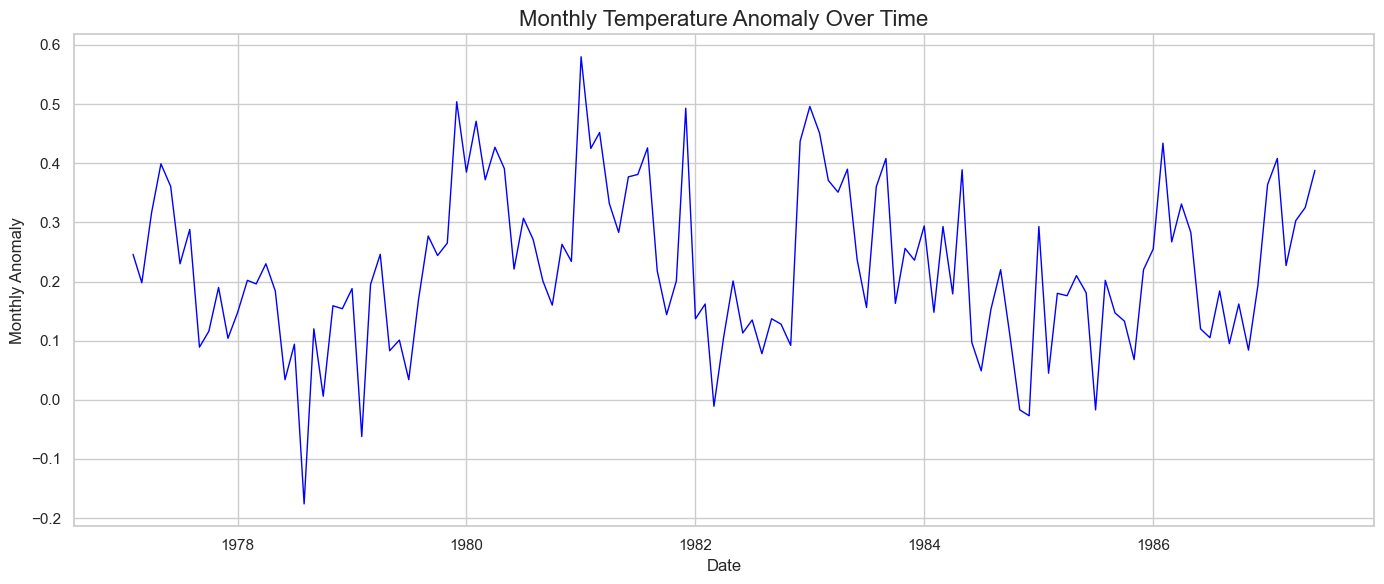

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plot the time series
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Monthly_Anomaly'], color='blue', linewidth=1)
plt.title("Monthly Temperature Anomaly Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Monthly Anomaly", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


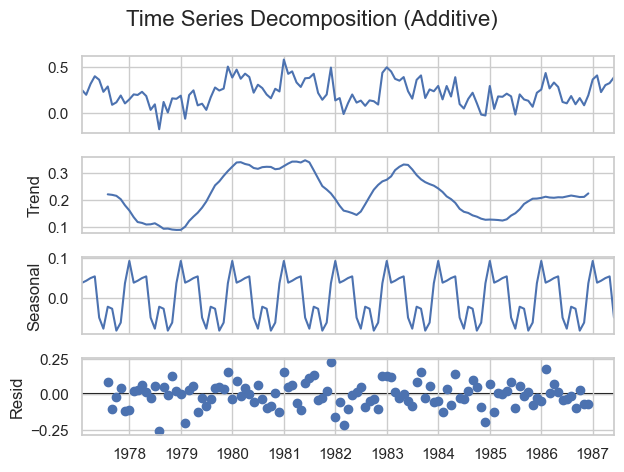

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
result = seasonal_decompose(df, model='additive', period=12)  # period=12 for monthly data (1 year)

# Plot the decomposition
result.plot()
plt.suptitle('Time Series Decomposition (Additive)', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable


Top 5 Dominant Seasonality Periods:
1. Period: 4.07 → Power: 0.0013
2. Period: 12.67 → Power: 0.0010
3. Period: 5.43 → Power: 0.0006
4. Period: 9.50 → Power: 0.0005
5. Period: 19.00 → Power: 0.0005


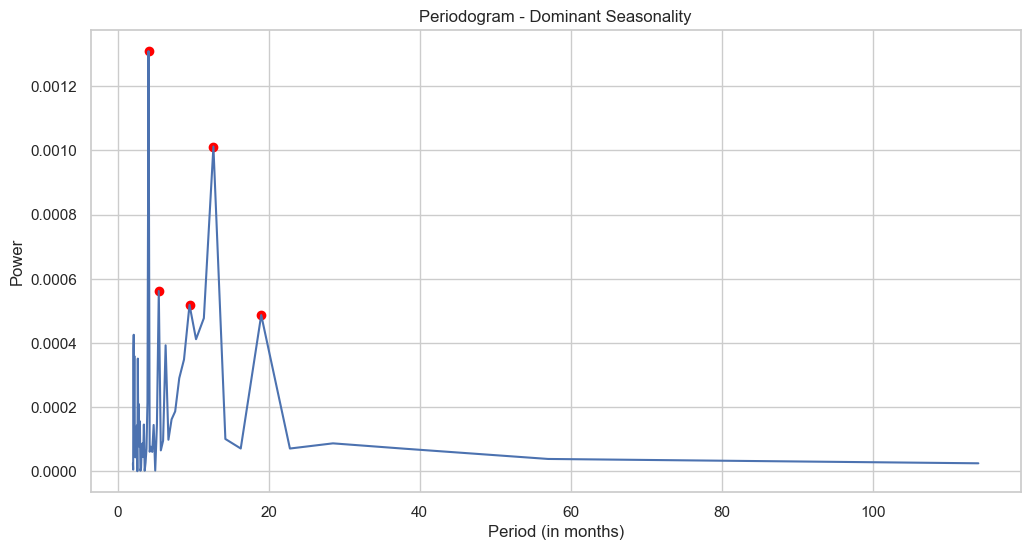

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram

# Assuming your time series is a pandas Series called `series`
# For example:
series = df['Monthly_Anomaly']

# Step 1: Remove trend (optional but recommended)
series_detrended = series - series.rolling(window=12, center=True).mean()
series_detrended = series_detrended.dropna()

# Step 2: Compute Periodogram
frequencies, power = periodogram(series_detrended, scaling='spectrum')

# Step 3: Convert frequency to period
# frequency = 1/period → period = 1/frequency
periods = 1 / frequencies

# Step 4: Filter out zero or infinite periods
valid = (frequencies > 0) & np.isfinite(periods)
frequencies = frequencies[valid]
power = power[valid]
periods = periods[valid]

# Step 5: Get top 5 dominant periods
top_indices = np.argsort(power)[-5:][::-1]
top_periods = periods[top_indices]
top_powers = power[top_indices]

# Print results
print("Top 5 Dominant Seasonality Periods:")
for i, (p, powr) in enumerate(zip(top_periods, top_powers), start=1):
    print(f"{i}. Period: {p:.2f} → Power: {powr:.4f}")

# Step 6: Plot Periodogram
plt.figure(figsize=(12, 6))
plt.plot(periods, power)
plt.scatter(top_periods, top_powers, color='red')
plt.xlabel('Period (in months)')
plt.ylabel('Power')
plt.title('Periodogram - Dominant Seasonality')
plt.grid(True)
plt.show()


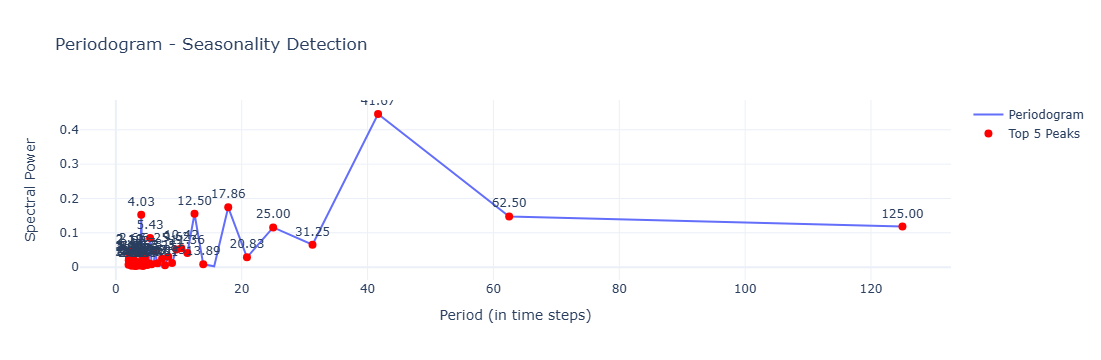

Top 5 Seasonality Periods (in time steps):
        Period     Power
2    41.666667  0.446038
6    17.857143  0.174279
9    12.500000  0.155392
30    4.032258  0.152836
1    62.500000  0.147724
0   125.000000  0.118028
4    25.000000  0.115664
22    5.434783  0.084943
3    31.250000  0.065151
11   10.416667  0.054942
12    9.615385  0.051022
46    2.659574  0.047595
19    6.250000  0.047589
56    2.192982  0.044141
10   11.363636  0.041301
58    2.118644  0.039835
29    4.166667  0.033894
14    8.333333  0.029953
44    2.777778  0.029137
5    20.833333  0.028528
26    4.629630  0.027322
16    7.352941  0.025071
59    2.083333  0.024819
50    2.450980  0.023373
57    2.155172  0.021198
60    2.049180  0.020127
27    4.464286  0.016830
54    2.272727  0.016157
35    3.472222  0.014812
48    2.551020  0.014144
37    3.289474  0.013990
13    8.928571  0.012413
18    6.578947  0.011468
23    5.208333  0.010972
42    2.906977  0.010631
43    2.840909  0.009315
45    2.717391  0.009245
21    5

In [ ]:
import numpy as np
import pandas as pd
from scipy.signal import periodogram
import plotly.graph_objects as go

# ----- Replace this with your time series -----
# Assume your monthly time series is in a Pandas Series called `series`
series = df['Monthly_Anomaly']
series = series.dropna().values  # ensure no NaNs

# ----- Step 1: Compute periodogram -----
frequencies, power = periodogram(series)

# ----- Step 2: Convert frequency to period -----
nonzero_indices = frequencies > 0  # avoid division by zero
frequencies = frequencies[nonzero_indices]
power = power[nonzero_indices]
periods = 1 / frequencies

# ----- Step 3: Create a dataframe to find top periods -----
df_periods = pd.DataFrame({'Period': periods, 'Power': power})
df_top = df_periods.sort_values(by='Power', ascending=False).head(50)

# ----- Step 4: Plot with Plotly -----
fig = go.Figure()

fig.add_trace(go.Scatter(x=periods, y=power,
                         mode='lines',
                         name='Periodogram'))

# Mark top 5 seasonal periods
fig.add_trace(go.Scatter(x=df_top['Period'], y=df_top['Power'],
                         mode='markers+text',
                         text=[f"{p:.2f}" for p in df_top['Period']],
                         textposition='top center',
                         marker=dict(color='red', size=8),
                         name='Top 5 Peaks'))

fig.update_layout(title='Periodogram - Seasonality Detection',
                  xaxis_title='Period (in time steps)',
                  yaxis_title='Spectral Power',
                  template='plotly_white')

fig.show()

# ----- Step 5: Print top 5 periods -----
print("Top 5 Seasonality Periods (in time steps):")
print(df_top[['Period', 'Power']])

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Apply ADF test
result = adfuller(df.dropna())  # dropna just in case

# Print results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -2.9118867365409447
p-value: 0.043983089978307126
Critical Values:
   1%: -3.490683082754047
   5%: -2.8879516565798817
   10%: -2.5808574442009578


In [ ]:
# p-value > 0.05  so we reject null hypothesis.Hence data is non-stationary

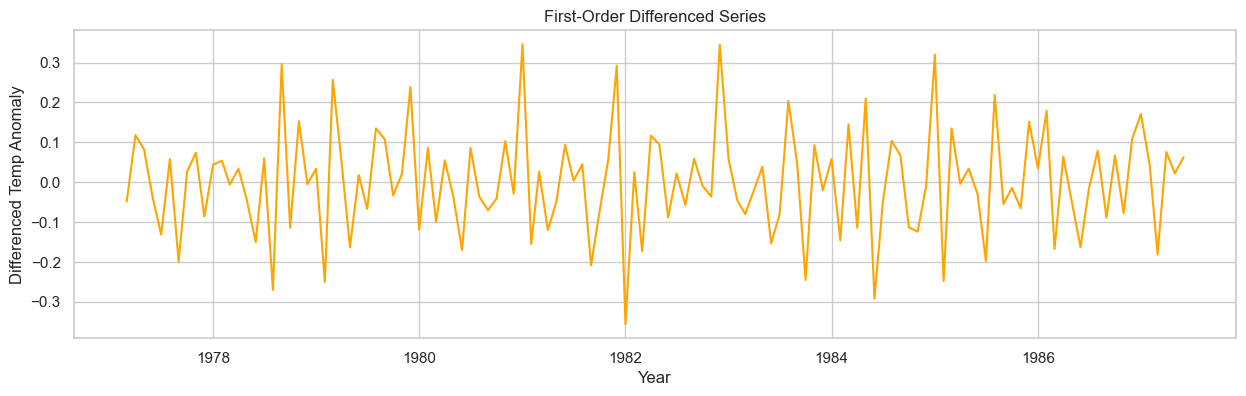

In [ ]:
df_diff = df.diff().dropna()

# Plot differenced series
plt.figure(figsize=(15, 4))
plt.plot(df_diff, color='orange')
plt.title('First-Order Differenced Series')
plt.xlabel('Year')
plt.ylabel('Differenced Temp Anomaly')
plt.grid(True)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_diff)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -5.626812999529545
p-value: 1.1125392657819852e-06
Critical Values:
   1%: -3.489057523907491
   5%: -2.887246327182993
   10%: -2.5804808802708528


In [ ]:
# p-value < 0.05 . So now differenced series is stationary

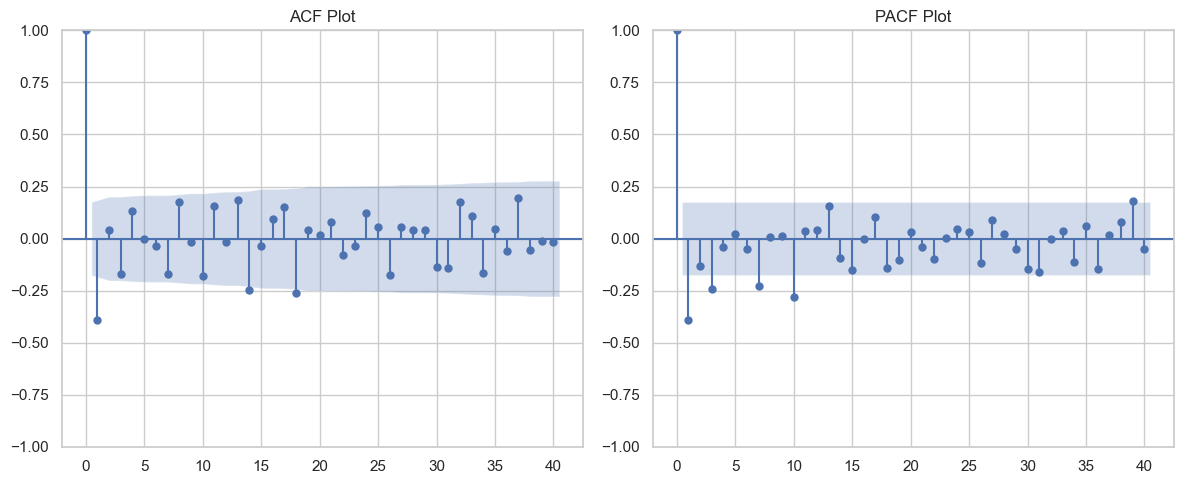

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_acf(df_diff, lags=40, ax=plt.gca())  # Use differenced data
plt.title('ACF Plot')

plt.subplot(1, 2, 2)
plot_pacf(df_diff, lags=40, ax=plt.gca(), method='ywm')  # safer method for PACF
plt.title('PACF Plot')

plt.tight_layout()
plt.show()


In [ ]:
import warnings
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import itertools

warnings.filterwarnings("ignore")

# Assuming your original data is in `df['Temperature']`
y = df['Monthly_Anomaly']

# Define parameter range
p = range(0, 4)
d = range(0, 2)
q = range(0, 4)

# Create all combinations
pdq = list(itertools.product(p, d, q))

# Track best model
best_aic = np.inf
best_order = None
results = []

for order in pdq:
    try:
        model = ARIMA(y, order=order)
        result = model.fit()
        results.append({'order': order, 'aic': result.aic})
        if result.aic < best_aic:
            best_aic = result.aic
            best_order = order
    except:
        continue

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results).sort_values(by='aic')

# Show best model
print("Best ARIMA order:", best_order)
print("Lowest AIC:", best_aic)
results_df.head()

Best ARIMA order: (3, 0, 3)
Lowest AIC: -186.5646851030621


order         aic
27  (3, 0, 3) -186.564685
16  (2, 0, 0) -180.874267
9   (1, 0, 1) -180.735488
30  (3, 1, 2) -180.568513
17  (2, 0, 1) -179.348812

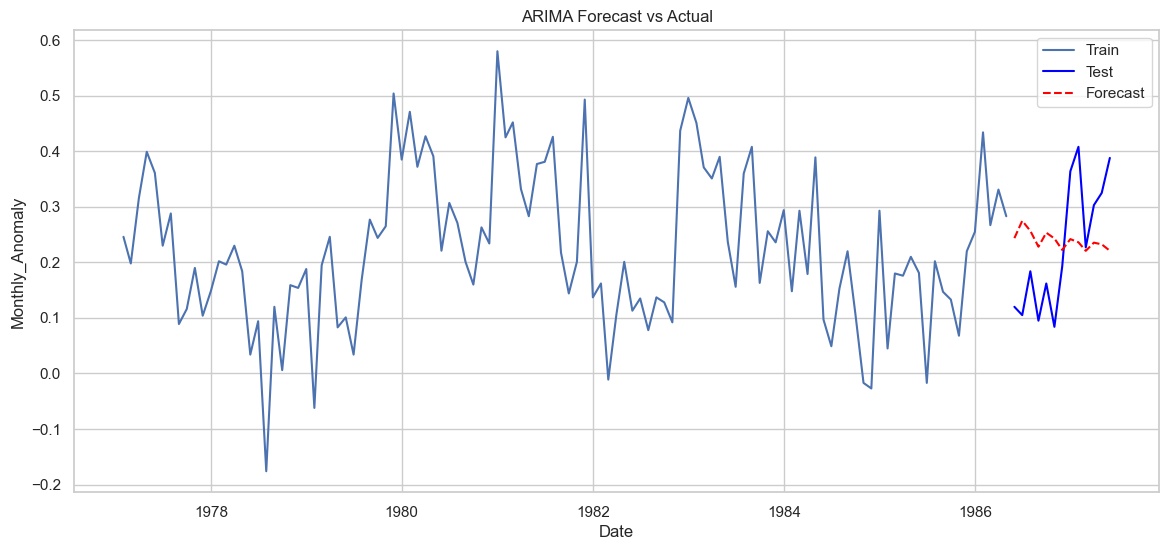

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

# Determine split index
split_index = int(len(df) * 0.9)

# Create training and test sets
train = df['Monthly_Anomaly'][:split_index]
test = df['Monthly_Anomaly'][split_index:]

# Fit model on training set with best parameters
best_order = (3, 0, 3)  # Replace with your best (p, d, q)
model = ARIMA(train, order=best_order)
model_fit = model.fit()

# Forecast the next len(test) periods
forecast = model_fit.forecast(steps=len(test))

# Plot actual vs forecast
plt.figure(figsize=(14,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Monthly_Anomaly')
plt.title('ARIMA Forecast vs Actual')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# Let’s assume your time series is already in a datetime index and sorted
ts = df['Monthly_Anomaly']

# 90-10 split
train_size = int(len(ts) * 0.95)
train, test = ts[:train_size], ts[train_size:]

print(f"Train size: {len(train)}, Test size: {len(test)}")

Train size: 118, Test size: 7


In [ ]:
# Fit SARIMAX with trend
model = SARIMAX(train, order=(3, 0, 3), trend='t')  # trend='t' adds a linear trend
model_fit = model.fit(disp=False)

In [ ]:
# Forecast the same number of steps as test set
forecast = model_fit.forecast(steps=len(test))


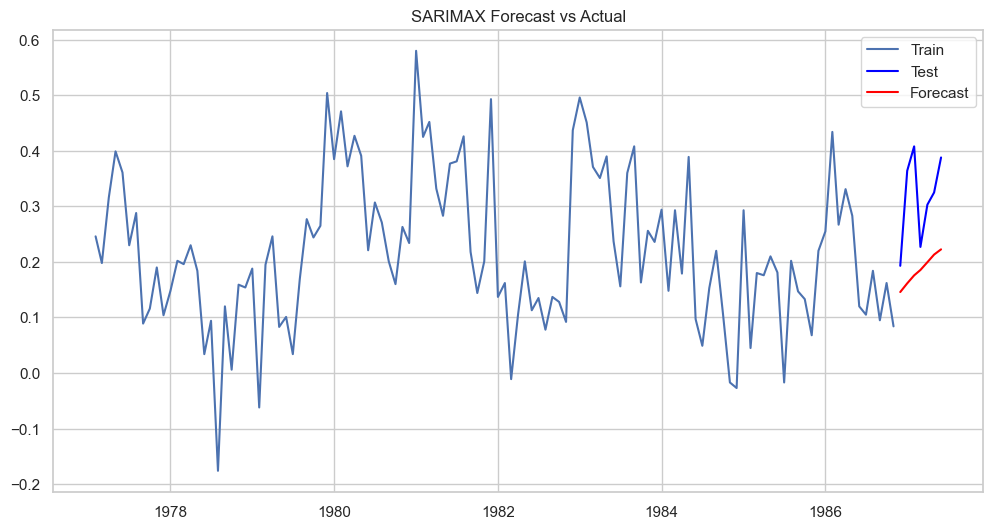

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('SARIMAX Forecast vs Actual')
plt.legend()
plt.grid(True)
plt.show()

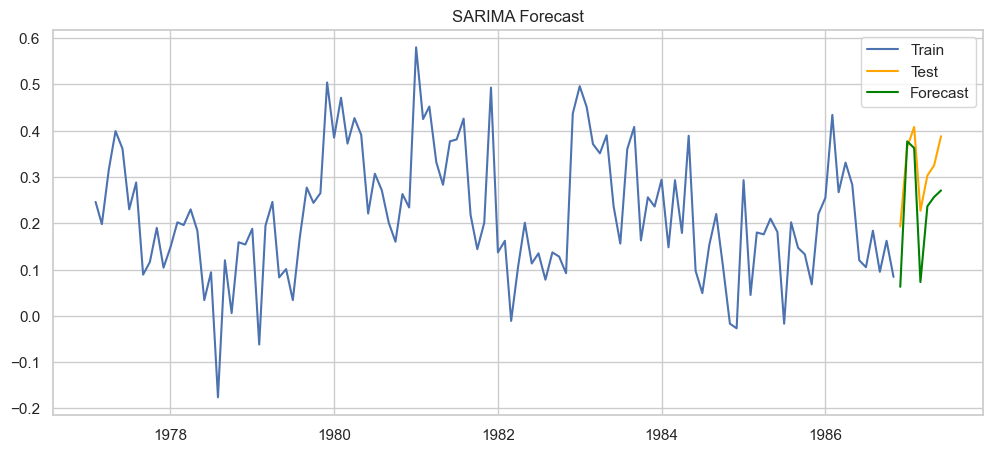

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 1: Prepare datetime index and data
data = df

# Step 2: Train-test split (90%-10%)
train_size = int(len(df) * 0.95)
train = data.iloc[:train_size]
test = data.iloc[train_size:]

# Step 3: Fit SARIMA model (SARIMAX with only endog → pure SARIMA)
model = SARIMAX(train,
                order=(3, 0, 3),
                seasonal_order=(2,1,1,41),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# Step 4: Forecast
forecast = results.forecast(steps=len(test))

# Step 5: Plot
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(test.index, forecast, label='Forecast', color='green')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

In [ ]:
df.shape

(600, 1)

In [ ]:
df.head()

Monthly_Anomaly
Date                       
1975-01-01            0.058
1975-02-01            0.134
1975-03-01            0.148
1975-04-01            0.113
1975-05-01            0.212

In [ ]:
df[25:150]

Monthly_Anomaly
Date                       
1977-02-01            0.246
1977-03-01            0.198
1977-04-01            0.316
1977-05-01            0.399
1977-06-01            0.361
...                     ...
1987-02-01            0.408
1987-03-01            0.227
1987-04-01            0.303
1987-05-01            0.325
1987-06-01            0.388

[125 rows x 1 columns]

In [ ]:
df.head()

Monthly_Anomaly
Date                       
1850-01-01           -0.753
1850-02-01           -0.202
1850-03-01           -0.367
1850-04-01           -0.596
1850-05-01           -0.619

In [ ]:
df1 = df[:1032]

In [ ]:
df1

Monthly_Anomaly
Date                       
1850-01-01           -0.753
1850-02-01           -0.202
1850-03-01           -0.367
1850-04-01           -0.596
1850-05-01           -0.619
...                     ...
1935-08-01           -0.223
1935-09-01           -0.235
1935-10-01           -0.038
1935-11-01           -0.390
1935-12-01           -0.185

[1032 rows x 1 columns]

In [ ]:
df2 = df[1032:1530]

In [ ]:
df2.head()

Monthly_Anomaly
Date                       
1936-01-01           -0.296
1936-02-01           -0.335
1936-03-01           -0.310
1936-04-01           -0.179
1936-05-01           -0.167

In [ ]:
df3 = df[1530:1655]

In [ ]:
df3.head()

Monthly_Anomaly
Date                       
1977-07-01            0.230
1977-08-01            0.288
1977-09-01            0.089
1977-10-01            0.116
1977-11-01            0.190

In [ ]:
df4 = df[1655:1820]

In [ ]:
df4.head()

Monthly_Anomaly
Date                       
1987-12-01            0.521
1988-01-01            0.564
1988-02-01            0.435
1988-03-01            0.467
1988-04-01            0.513

In [ ]:
df5 = df[1820:1970]

In [ ]:
df5

Monthly_Anomaly
Date                       
2001-09-01            0.555
2001-10-01            0.511
2001-11-01            0.711
2001-12-01            0.678
2002-01-01            0.779
...                     ...
2013-10-01            0.705
2013-11-01            0.839
2013-12-01            0.744
2014-01-01            0.795
2014-02-01            0.591

[150 rows x 1 columns]

In [ ]:
df6 = df[1970:]

In [ ]:
df6.head()

Monthly_Anomaly
Date                       
2014-03-01            0.787
2014-04-01            0.863
2014-05-01            0.902
2014-06-01            0.685
2014-07-01            0.585

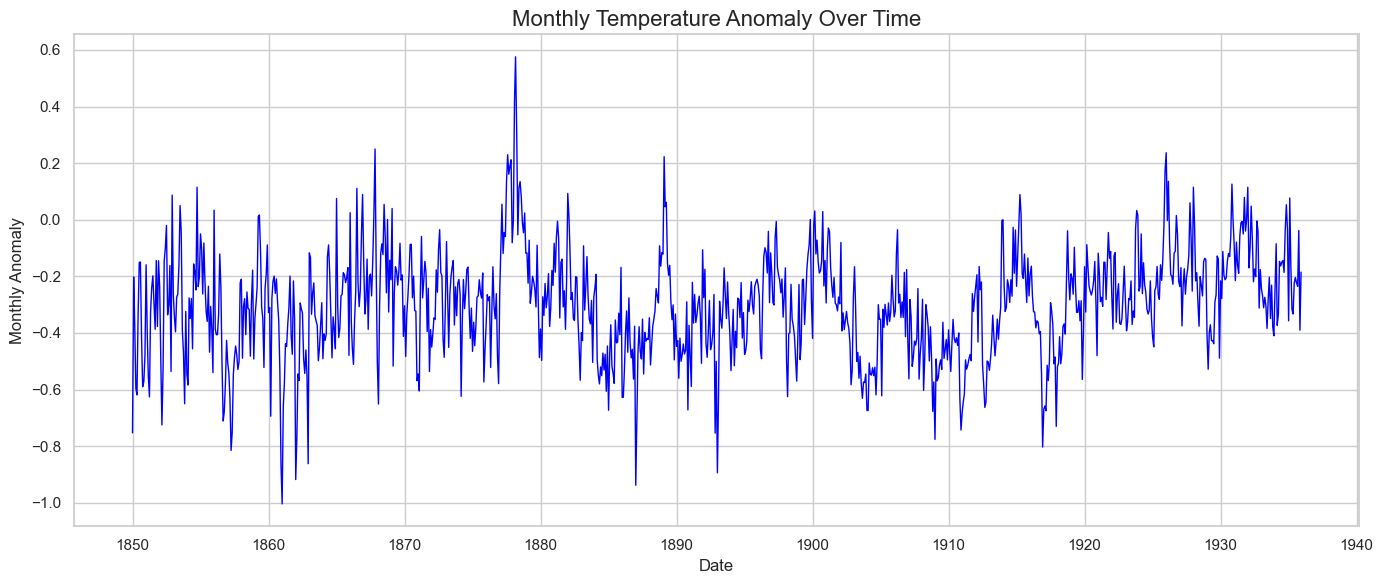

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plot the time series
plt.figure(figsize=(14, 6))
plt.plot(df1.index, df1['Monthly_Anomaly'], color='blue', linewidth=1)
plt.title("Monthly Temperature Anomaly Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Monthly Anomaly", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


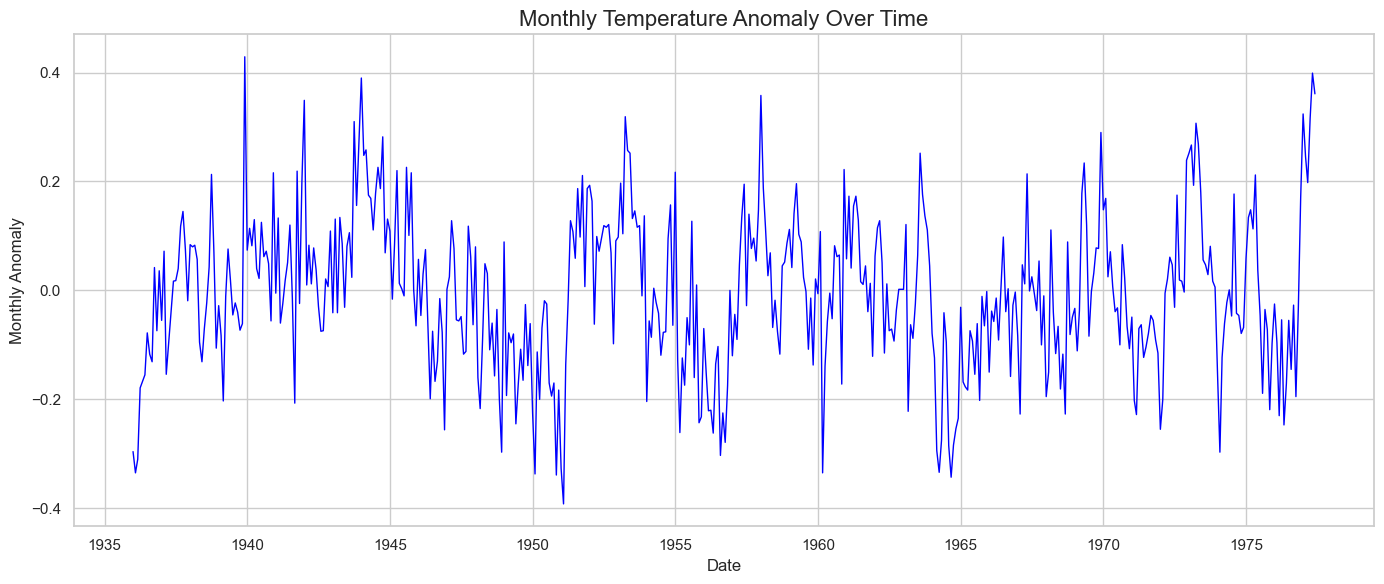

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plot the time series
plt.figure(figsize=(14, 6))
plt.plot(df2.index, df2['Monthly_Anomaly'], color='blue', linewidth=1)
plt.title("Monthly Temperature Anomaly Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Monthly Anomaly", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


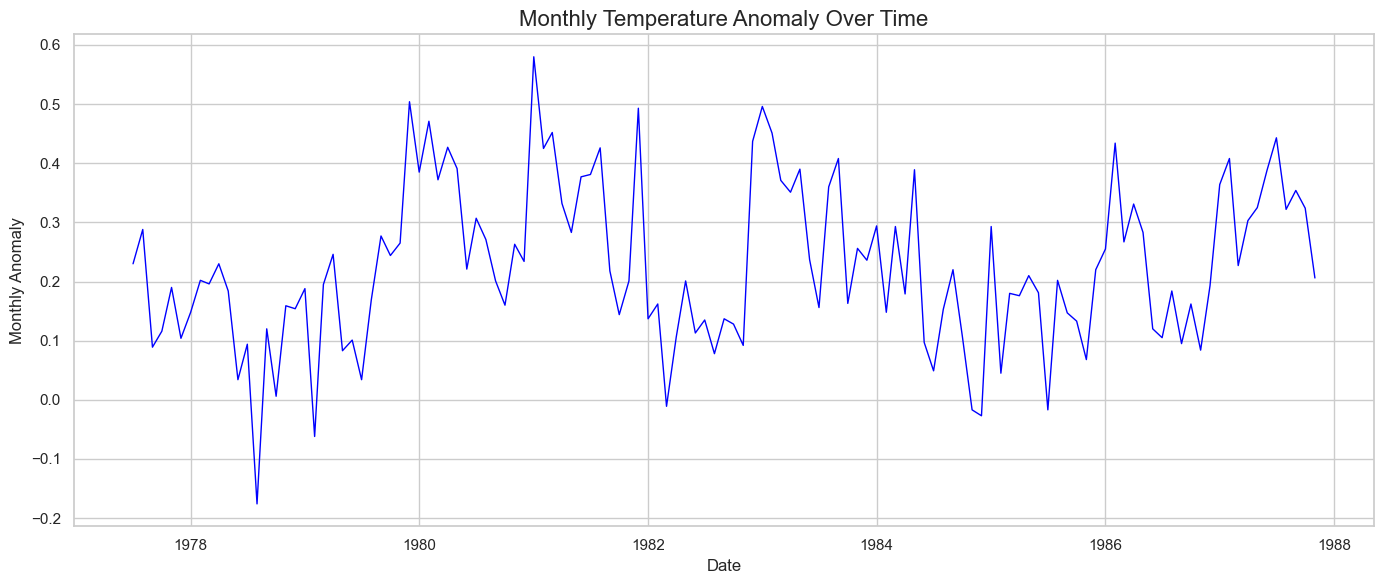

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plot the time series
plt.figure(figsize=(14, 6))
plt.plot(df3.index, df3['Monthly_Anomaly'], color='blue', linewidth=1)
plt.title("Monthly Temperature Anomaly Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Monthly Anomaly", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


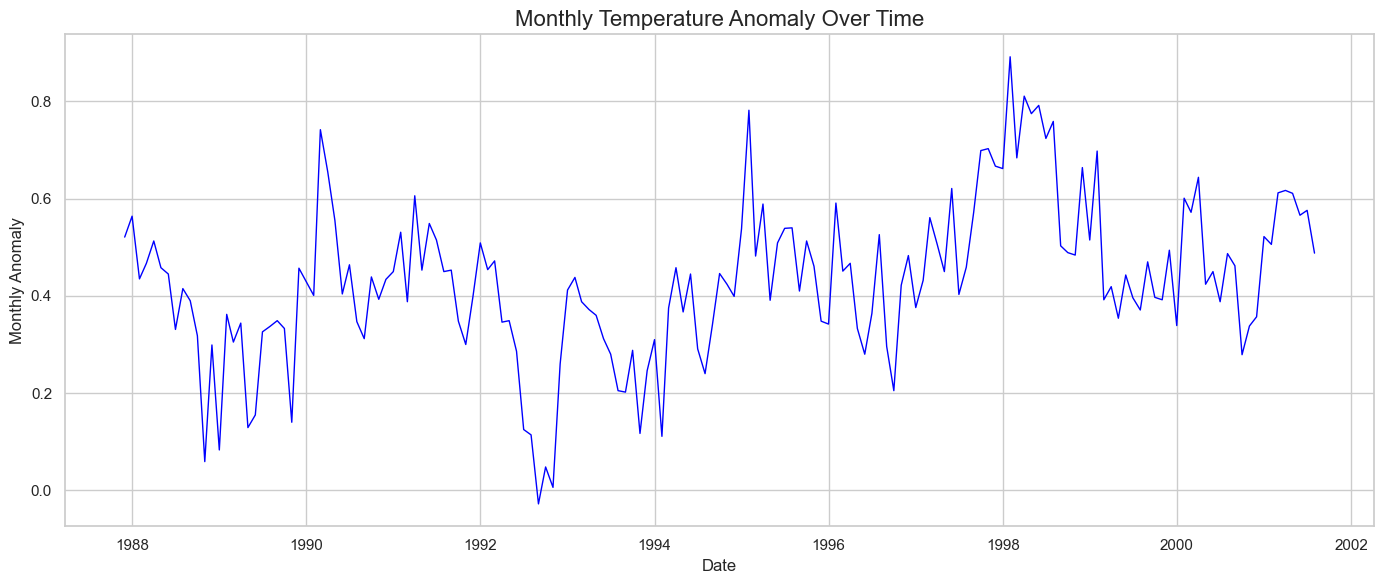

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plot the time series
plt.figure(figsize=(14, 6))
plt.plot(df4.index, df4['Monthly_Anomaly'], color='blue', linewidth=1)
plt.title("Monthly Temperature Anomaly Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Monthly Anomaly", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


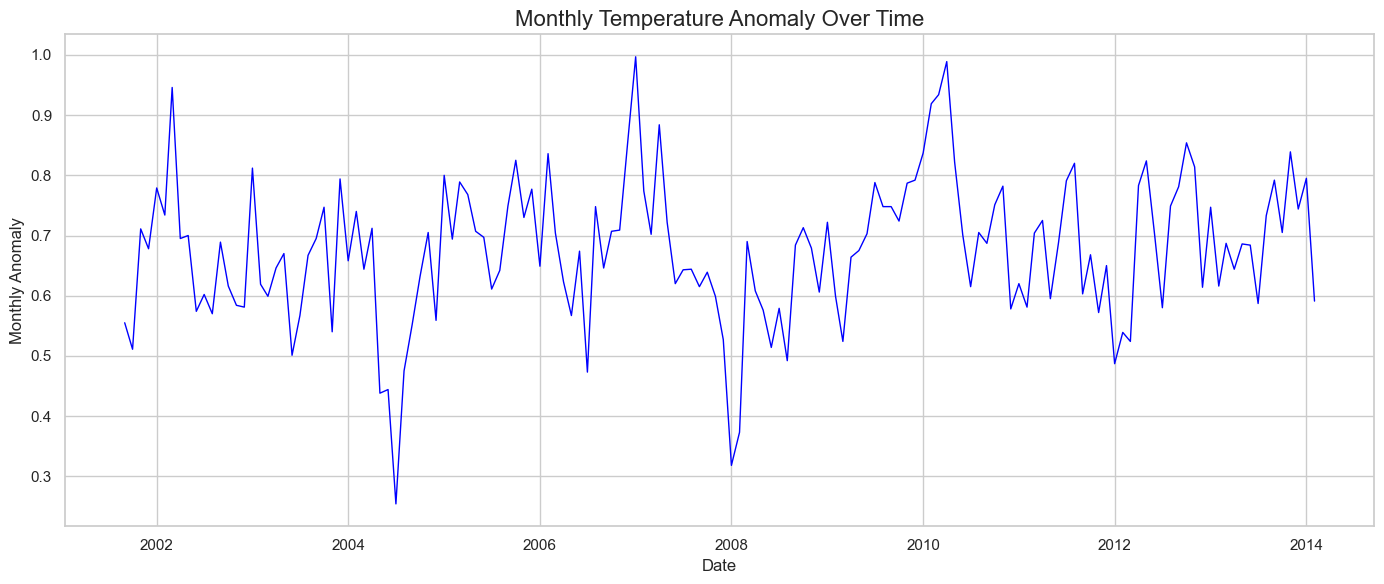

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plot the time series
plt.figure(figsize=(14, 6))
plt.plot(df5.index, df5['Monthly_Anomaly'], color='blue', linewidth=1)
plt.title("Monthly Temperature Anomaly Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Monthly Anomaly", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


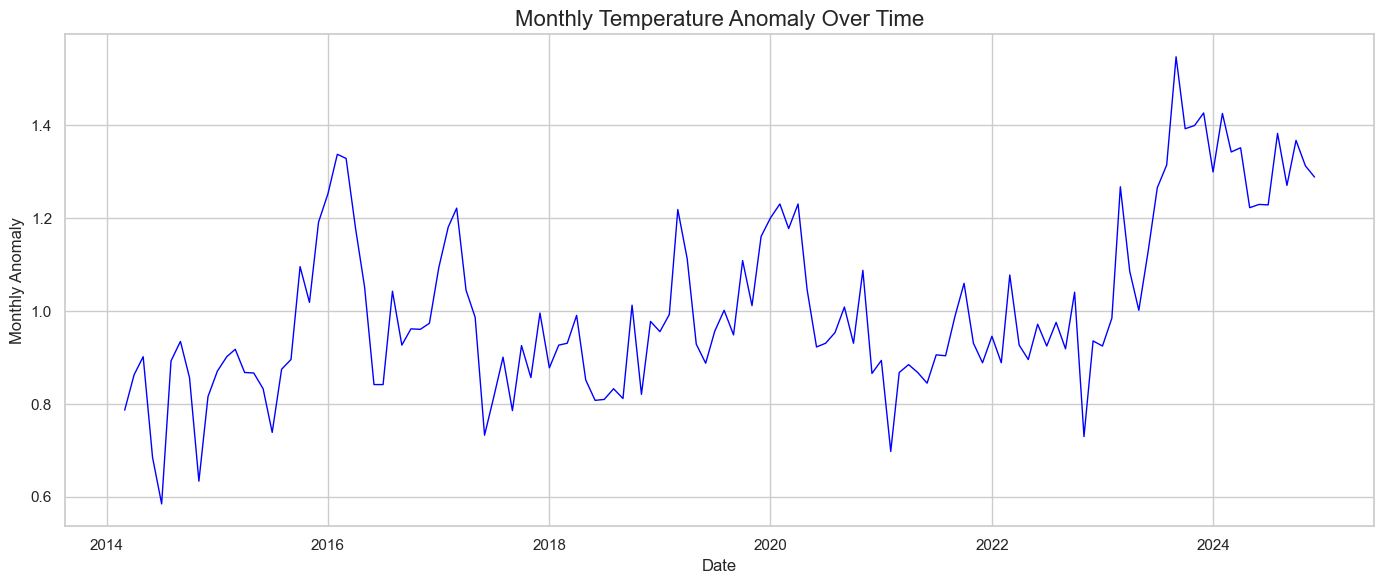

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plot the time series
plt.figure(figsize=(14, 6))
plt.plot(df6.index, df6['Monthly_Anomaly'], color='blue', linewidth=1)
plt.title("Monthly Temperature Anomaly Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Monthly Anomaly", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import warnings
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import itertools
df = df6
warnings.filterwarnings("ignore")

# Assuming your original data is in `df['Temperature']`
y = df['Monthly_Anomaly']

# Define parameter range
p = range(0, 4)
d = range(0, 2)
q = range(0, 4)

# Create all combinations
pdq = list(itertools.product(p, d, q))

# Track best model
best_aic = np.inf
best_order = None
results = []

for order in pdq:
    try:
        model = ARIMA(y, order=order)
        result = model.fit()
        results.append({'order': order, 'aic': result.aic})
        if result.aic < best_aic:
            best_aic = result.aic
            best_order = order
    except:
        continue

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results).sort_values(by='aic')

# Show best model
print("Best ARIMA order:", best_order)
print("Lowest AIC:", best_aic)
results_df.head()

Best ARIMA order: (2, 0, 0)
Lowest AIC: -192.61228571695216


order         aic
16  (2, 0, 0) -192.612286
9   (1, 0, 1) -192.100091
17  (2, 0, 1) -191.086983
7   (0, 1, 3) -191.008980
24  (3, 0, 0) -190.901059

In [ ]:
import numpy as np
import pandas as pd
from scipy.signal import periodogram
import plotly.graph_objects as go

# ----- Replace this with your time series -----
# Assume your monthly time series is in a Pandas Series called `series`
series = df['Monthly_Anomaly']
series = series.dropna().values  # ensure no NaNs

# ----- Step 1: Compute periodogram -----
frequencies, power = periodogram(series)

# ----- Step 2: Convert frequency to period -----
nonzero_indices = frequencies > 0  # avoid division by zero
frequencies = frequencies[nonzero_indices]
power = power[nonzero_indices]
periods = 1 / frequencies

# ----- Step 3: Create a dataframe to find top periods -----
df_periods = pd.DataFrame({'Period': periods, 'Power': power})
df_top = df_periods.sort_values(by='Power', ascending=False).head(50)

# ----- Step 4: Plot with Plotly -----
fig = go.Figure()

fig.add_trace(go.Scatter(x=periods, y=power,
                         mode='lines',
                         name='Periodogram'))

# Mark top 5 seasonal periods
fig.add_trace(go.Scatter(x=df_top['Period'], y=df_top['Power'],
                         mode='markers+text',
                         text=[f"{p:.2f}" for p in df_top['Period']],
                         textposition='top center',
                         marker=dict(color='red', size=8),
                         name='Top 5 Peaks'))

fig.update_layout(title='Periodogram - Seasonality Detection',
                  xaxis_title='Period (in time steps)',
                  yaxis_title='Spectral Power',
                  template='plotly_white')

fig.show()

# ----- Step 5: Print top 5 periods -----
print("Top 5 Seasonality Periods (in time steps):")
print(df_top[['Period', 'Power']])

Top 5 Seasonality Periods (in time steps):
        Period     Power
2    43.333333  1.546853
1    65.000000  0.404917
0   130.000000  0.397752
3    32.500000  0.330503
9    13.000000  0.320304
10   11.818182  0.298747
4    26.000000  0.269394
21    5.909091  0.096985
13    9.285714  0.091715
6    18.571429  0.062986
20    6.190476  0.052027
32    3.939394  0.051672
43    2.954545  0.047687
53    2.407407  0.037116
8    14.444444  0.030680
19    6.500000  0.028105
17    7.222222  0.027711
59    2.166667  0.027422
18    6.842105  0.027236
45    2.826087  0.025794
22    5.652174  0.025314
30    4.193548  0.024595
55    2.321429  0.023029
15    8.125000  0.020407
62    2.063492  0.018501
37    3.421053  0.018458
11   10.833333  0.017761
50    2.549020  0.017500
16    7.647059  0.017261
64    2.000000  0.016487
39    3.250000  0.016126
33    3.823529  0.015546
5    21.666667  0.015261
63    2.031250  0.014558
24    5.200000  0.014389
28    4.482759  0.014320
56    2.280702  0.013789
57    2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 1: Prepare datetime index and data
data = df

# Step 2: Train-test split (90%-10%)
train_size = int(len(df) * 0.95)
train = data.iloc[:train_size]
test = data.iloc[train_size:]

# Step 3: Fit SARIMA model (SARIMAX with only endog → pure SARIMA)
model = SARIMAX(train,
                order=(2, 0, 1),
                seasonal_order=(2,1,2,20),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# Step 4: Forecast
forecast = results.forecast(steps=len(test))

# Step 5: Plot
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(test.index, forecast, label='Forecast', color='green')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()